# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# =============================================================================
# IMPORT LIBRARY
# =============================================================================
# Untuk manipulasi data
import pandas as pd
import numpy as np

# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk pembagian dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

# Algoritma Klasifikasi yang akan digunakan
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Metrik untuk evaluasi performa model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Untuk optimasi hyperparameter
from sklearn.model_selection import GridSearchCV

# Untuk menyimpan dan memuat model machine learning
import joblib

# Untuk mengabaikan peringatan
import warnings
warnings.filterwarnings('ignore')

# Set opsi Pandas untuk menampilkan semua kolom DataFrame
pd.set_option('display.max_columns', None)

print("Semua pustaka berhasil diimpor!")

Semua pustaka berhasil diimpor!


  * **Metode yang digunakan:**
      * Mengimpor pustaka-pustaka standar Python yang esensial untuk proyek machine learning.
  * **Alasan penggunaan:**
      * **Pandas (`pd`)**: Untuk manipulasi dan analisis data tabular (DataFrame). Krusial untuk memuat, membersihkan, dan mentransformasi dataset.
      * **NumPy (`np`)**: Untuk operasi numerik, terutama array multidimensi yang menjadi dasar bagi banyak operasi di Pandas dan Scikit-learn.
      * **Matplotlib (`plt`) dan Seaborn (`sns`)**: Untuk visualisasi data. Membantu dalam memahami distribusi data, hubungan antar fitur, dan hasil evaluasi model (confusion matrix).
      * **`train_test_split` dari `sklearn.model_selection`**: Untuk membagi dataset menjadi data latih (training) dan data uji (testing), yang merupakan praktik standar untuk evaluasi model yang objektif.
      * **Algoritma Klasifikasi dari `sklearn`**:
          * `DecisionTreeClassifier`: Algoritma pohon keputusan, model dasar yang mudah diinterpretasi.
          * `RandomForestClassifier`: Algoritma ensemble berbasis pohon keputusan, umumnya memberikan performa lebih baik dan lebih robust terhadap overfitting dibandingkan Decision Tree tunggal.
          * `LogisticRegression`: Algoritma linear untuk klasifikasi, baik untuk baseline dan masalah yang dapat dipisahkan secara linear.
          * `KNeighborsClassifier`: Algoritma berbasis instans yang mengklasifikasikan data baru berdasarkan mayoritas kelas dari k tetangga terdekatnya.
      * **Metrik Evaluasi dari `sklearn.metrics`**:
          * `accuracy_score`, `precision_score`, `recall_score`, `f1_score`: Metrik kuantitatif untuk mengukur performa model klasifikasi.
          * `classification_report`: Memberikan ringkasan presisi, recall, F1-score, dan support untuk setiap kelas.
          * `confusion_matrix`: Tabel yang menggambarkan performa model dengan menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.
      * **`GridSearchCV` dari `sklearn.model_selection`**: Untuk optimasi hyperparameter model secara sistematis dengan mencoba berbagai kombinasi parameter dan memilih yang terbaik berdasarkan skor validasi silang.
      * **`joblib`**: Untuk menyimpan (serialisasi) model machine learning yang sudah dilatih ke disk dan memuatnya kembali nanti. Efisien untuk objek Python yang besar seperti model Scikit-learn.
      * **`warnings`**: Untuk mengontrol penanganan pesan peringatan, di sini digunakan untuk mengabaikannya agar output lebih bersih.
      * **`pd.set_option('display.max_columns', None)`**: Untuk memastikan semua kolom dalam DataFrame Pandas ditampilkan saat dicetak, berguna untuk inspeksi data yang lebar.
  * **Insight dan Hasil yang didapat:**
      * Output: `Semua pustaka berhasil diimpor!`
      * Ini mengonfirmasi bahwa semua pustaka yang dibutuhkan telah berhasil diimpor ke dalam lingkungan Python dan siap digunakan untuk analisis selanjutnya. Tidak ada error pada tahap ini menunjukkan bahwa semua dependensi telah terinstal dengan benar.

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Gunakan dataset hasil clustering yang memiliki fitur Target

# =============================================================================
# LOAD DATASET
# =============================================================================
try:
    # Membaca dataset menggunakan pandas
    df = pd.read_csv('data_clustering_inverse.csv')
    print(f"Dataset 'data_clustering_inverse.csv' berhasil dimuat!")
except FileNotFoundError:
    print(f"ERROR: File dataset 'data_clustering_inverse.csv' tidak ditemukan.")
    print("Pastikan nama file sudah benar dan file berada di lokasi yang sesuai.")
    # exit()
except Exception as e:
    print(f"Terjadi kesalahan saat memuat dataset: {e}")
    # exit()

Dataset 'data_clustering_inverse.csv' berhasil dimuat!


  * **Metode yang digunakan:**
      * Fungsi `pd.read_csv()` dari pustaka Pandas digunakan untuk memuat data dari file CSV.
      * Struktur `try-except` digunakan untuk menangani potensi error saat memuat file, seperti `FileNotFoundError`.
  * **Alasan penggunaan:**
      * Proyek ini adalah kelanjutan dari tahap clustering, di mana dataset `data_clustering_inverse.csv` berisi fitur-fitur asli yang telah di-inverse transform dan kolom `Target` yang merupakan label hasil clustering. Dataset ini akan digunakan untuk melatih model klasifikasi.
  * **Insight dan Hasil yang didapat:**
      * Output: `Dataset 'data_clustering_inverse.csv' berhasil dimuat!`
      * Ini menunjukkan bahwa file `data_clustering_inverse.csv` berhasil ditemukan dan dimuat ke dalam DataFrame Pandas bernama `df`. Proses selanjutnya dapat menggunakan `df` ini.

In [3]:
# Menampilkan 5 baris pertama dari dataset untuk inspeksi awal
print("\nLima baris pertama dataset:")
print(df.head())

# Menampilkan informasi umum tentang dataset (jumlah entri, tipe data per kolom, dll.)
print("\nInformasi dataset:")
df.info()

# Menampilkan statistik deskriptif untuk kolom numerik
print("\nStatistik deskriptif dataset (kolom numerik):")
print(df.describe().transpose())

# Menampilkan statistik deskriptif untuk kolom kategorikal
if not df.select_dtypes(include=['object', 'category']).empty:
    print("\nStatistik deskriptif dataset (kolom kategorikal/objek):")
    print(df.describe(include=['object', 'category']).transpose())
else:
    print("\nTidak ada kolom kategorikal/objek murni yang terdeteksi untuk statistik deskriptif tambahan.")


# Memeriksa keberadaan dan distribusi kolom target ('Target')
if 'Target' in df.columns:
    print(f"\nKolom 'Target' ditemukan.")
    print(f"Jumlah kelas unik dalam 'Target': {df['Target'].nunique()}")
    print("Distribusi kelas dalam 'Target' (dalam persentase):")
    print(df['Target'].value_counts(normalize=True) * 100)
else:
    print("\nERROR: Kolom 'Target' tidak ditemukan dalam dataset!")
    print("Pastikan menggunakan dataset yang benar dari hasil clustering.")
    # exit()


Lima baris pertama dataset:
   TransactionAmount TransactionType   Location Channel  CustomerAge  \
0              14.09           Debit  San Diego     ATM         70.0   
1             376.24           Debit    Houston     ATM         68.0   
2             126.29           Debit       Mesa  Online         19.0   
3             184.50           Debit    Raleigh  Online         26.0   
4              13.45          Credit    Atlanta  Online         45.0   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0             Doctor                 81.0            1.0         5112.21   
1             Doctor                141.0            1.0        13758.91   
2            Student                 56.0            1.0         1122.35   
3            Student                 25.0            1.0         8569.06   
4            Student                198.0            1.0         7429.40   

   Target TransactionAmount_Binned_Original_Label  
0       2                    

  * **Metode yang digunakan:**
      * `df.head()`: Menampilkan n baris pertama DataFrame (default 5).
      * `df.info()`: Memberikan ringkasan DataFrame, termasuk jumlah entri, jumlah non-null per kolom, dan tipe data setiap kolom.
      * `df.describe()`: Menghasilkan statistik deskriptif untuk kolom numerik (count, mean, std, min, quartile, max). `.transpose()` digunakan untuk tampilan yang lebih rapi.
      * `df.describe(include=['object', 'category'])`: Menghasilkan statistik deskriptif untuk kolom kategorikal/objek (count, unique, top, freq).
      * `df['Target'].nunique()`: Menghitung jumlah nilai unik dalam kolom 'Target'.
      * `df['Target'].value_counts(normalize=True)`: Menghitung frekuensi relatif (proporsi) setiap kelas dalam kolom 'Target'.
  * **Alasan penggunaan:**
      * **Inspeksi Awal (`df.head()`):** Untuk mendapatkan gambaran cepat tentang struktur dan isi data, memastikan data dimuat dengan benar.
      * **Informasi Umum (`df.info()`):** Untuk memahami tipe data setiap kolom, dan mendeteksi adanya missing values (nilai null).
      * **Statistik Deskriptif (`df.describe()`):**
          * Untuk kolom numerik: Memahami sebaran data (mean, median/50th percentile, std), rentang nilai (min, max), dan potensi outlier.
          * Untuk kolom kategorikal: Memahami jumlah kategori unik, kategori paling umum (top), dan frekuensinya.
      * **Analisis Kolom Target:** Memastikan kolom `Target` ada, mengetahui jumlah kelas yang akan diprediksi, dan memeriksa distribusi kelas. Distribusi kelas yang tidak seimbang (imbalanced classes) mungkin memerlukan teknik penanganan khusus.
  * **Insight dan Hasil yang didapat:**
      * **Output `df.head()`:**
          * Menampilkan 5 baris pertama dataset dengan kolom-kolom seperti `TransactionAmount`, `TransactionType`, `Location`, `Channel`, `CustomerAge`, `CustomerOccupation`, `TransactionDuration`, `LoginAttempts`, `AccountBalance`, `Target`, dan `TransactionAmount_Binned_Original_Label`.
          * Terlihat bahwa kolom `Target` berisi nilai integer (misalnya 0, 1, 2, 3), yang merupakan label dari proses clustering.
          * Kolom seperti `TransactionType`, `Location`, `Channel`, `CustomerOccupation`, dan `TransactionAmount_Binned_Original_Label` adalah tipe objek (kemungkinan string/kategorikal).
      * **Output `df.info()`:**
          * `RangeIndex: 2513 entries, 0 to 2512`: Dataset memiliki 2513 baris.
          * `Data columns (total 11 columns)`: Dataset memiliki 11 kolom.
          * **Missing Values Terdeteksi**:
              * `TransactionType`: 2483 non-null (2513 - 2483 = 30 missing)
              * `Location`: 2483 non-null (30 missing)
              * `Channel`: 2486 non-null (27 missing)
              * `CustomerOccupation`: 2490 non-null (23 missing)
          * **Tipe Data**: Campuran `float64` (numerik), `int64` (Target), dan `object` (kategorikal). Ini mengindikasikan perlunya encoding untuk kolom objek sebelum pemodelan.
      * **Output `df.describe().transpose()` (numerik):**
          * `TransactionAmount`: Rata-rata 283.62, std 249.63, min 0.26, max 899.285.
          * `CustomerAge`: Rata-rata 44.63, rentang 18-80 tahun.
          * `TransactionDuration`: Rata-rata 119.48 detik.
          * `LoginAttempts`: Nilai konstan 1 (min, mean, max semua 1.00). Kolom ini mungkin tidak informatif karena tidak memiliki variasi.
          * `AccountBalance`: Rata-rata 5114.24.
          * `Target`: Rata-rata 1.46, min 0, max 3. Menunjukkan bahwa label Target adalah numerik (hasil encoding dari cluster).
      * **Output `df.describe(include=['object', 'category']).transpose()` (kategorikal):**
          * `TransactionType`: 2 unik, `Debit` paling umum (1921 kali).
          * `Location`: 43 unik, `Fort Worth` paling umum (70 kali). Banyaknya kategori unik di `Location` perlu diperhatikan saat encoding (potensi dimensionalitas tinggi).
          * `Channel`: 3 unik, `Branch` paling umum (859 kali).
          * `CustomerOccupation`: 4 unik, `Student` paling umum (651 kali).
          * `TransactionAmount_Binned_Original_Label`: 3 unik, `Amount_Bin_1` paling umum (1578 kali).
      * **Output Analisis Kolom Target:**
          * `Kolom 'Target' ditemukan.`
          * `Jumlah kelas unik dalam 'Target': 4`. Ini berarti masalah klasifikasi ini adalah multiclass classification dengan 4 kelas target.
          * `Distribusi kelas dalam 'Target' (dalam persentase):`
              * Kelas 1: \~27.10%
              * Kelas 0: \~25.87%
              * Kelas 3: \~25.63%
              * Kelas 2: \~21.41%
          * Distribusi kelas terlihat cukup seimbang, tidak ada kelas yang sangat dominan atau sangat minoritas. Ini baik karena model tidak akan bias ke kelas mayoritas dan metrik seperti akurasi bisa lebih representatif.

In [4]:
# =============================================================================
# DATA PREPARATION (SEPARATING FEATURES AND TARGETS)
# =============================================================================
# Memisahkan fitur (X) dan target (y)
if 'Target' in df.columns:
    X = df.drop('Target', axis=1) # Semua kolom kecuali 'Target' adalah fitur
    y = df['Target']             # Kolom 'Target' adalah variabel yang akan diprediksi

    print("Pemisahan fitur (X) dan target (y) berhasil.")
    print("Dimensi Fitur (X):", X.shape)
    print("Dimensi Target (y):", y.shape)

    # Verifikasi tipe data fitur.
    non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
    if len(non_numeric_cols) > 0:
        print(f"\nPERHATIAN: Ditemukan kolom non-numerik pada fitur X: {list(non_numeric_cols)}")
        print("Kolom ini mungkin perlu di-encode sebelum melatih model.")
    else:
        print("\nSemua fitur (X) sudah dalam format numerik.")
else:
    print("ERROR: Tidak dapat memisahkan fitur dan target karena kolom 'Target' tidak ditemukan.")
    # exit()

Pemisahan fitur (X) dan target (y) berhasil.
Dimensi Fitur (X): (2513, 10)
Dimensi Target (y): (2513,)

PERHATIAN: Ditemukan kolom non-numerik pada fitur X: ['TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'TransactionAmount_Binned_Original_Label']
Kolom ini mungkin perlu di-encode sebelum melatih model.


  * **Metode yang digunakan:**
      * `df.drop('Target', axis=1)`: Membuat DataFrame baru `X` yang berisi semua kolom dari `df` kecuali kolom `Target`. `axis=1` menunjukkan bahwa yang di-drop adalah kolom.
      * `df['Target']`: Membuat Series baru `y` yang hanya berisi kolom `Target`.
      * `X.select_dtypes(include=['object', 'category']).columns`: Mengidentifikasi kolom-kolom dalam `X` yang bertipe data objek atau kategori (non-numerik).
  * **Alasan penggunaan:**
      * Dalam supervised learning, dataset perlu dipisahkan menjadi matriks fitur (variabel independen, `X`) dan vektor target (variabel dependen, `y`). Model akan belajar memetakan `X` ke `y`.
      * Pengecekan kolom non-numerik pada `X` penting karena sebagian besar algoritma machine learning di Scikit-learn memerlukan input numerik. Kolom non-numerik perlu di-encode.
  * **Insight dan Hasil yang didapat:**
      * Output:
          * `Pemisahan fitur (X) dan target (y) berhasil.`
          * `Dimensi Fitur (X): (2513, 10)`: Ada 2513 sampel dan 10 fitur.
          * `Dimensi Target (y): (2513,)`: Ada 2513 label target, sesuai dengan jumlah sampel.
          * `PERHATIAN: Ditemukan kolom non-numerik pada fitur X: ['TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'TransactionAmount_Binned_Original_Label']`
          * `Kolom ini mungkin perlu di-encode sebelum melatih model.`
      * Pemisahan berhasil dilakukan. Output mengonfirmasi dimensi `X` dan `y`.
      * Peringatan yang muncul sangat penting: ada 5 kolom fitur yang masih bersifat non-numerik. Ini sejalan dengan temuan dari `df.info()`. Langkah encoding akan menjadi krusial sebelum melatih model.

# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.

# =============================================================================
# TRAIN-TEST SPLIT
# =============================================================================
# Membagi data menjadi data latih dan data uji
try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,       # Proporsi data uji (20%)
        random_state=42,     # Untuk reproduktifitas hasil
        stratify=y           # Menjaga proporsi kelas target
    )

    print("Pembagian dataset menjadi data latih dan data uji berhasil.")
    print("Dimensi X_train:", X_train.shape)
    print("Dimensi X_test:", X_test.shape)
    print("Dimensi y_train:", y_train.shape)
    print("Dimensi y_test:", y_test.shape)

    print("\nProporsi kelas pada y_train:")
    print(y_train.value_counts(normalize=True) * 100)
    print("\nProporsi kelas pada y_test:")
    print(y_test.value_counts(normalize=True) * 100)

except NameError:
    print("ERROR: Variabel X atau y belum terdefinisi. Pastikan persiapan data sudah dijalankan.")
    # exit()
except Exception as e:
    print(f"Terjadi kesalahan saat melakukan train-test split: {e}")
    # exit()

# =============================================================================
# HANDLE NON-NUMERIC FEATURES (AFTER SPLITTING)
# =============================================================================
# Identifikasi kolom non-numerik di X_train
non_numeric_cols = X_train.select_dtypes(include=['object', 'category']).columns

if len(non_numeric_cols) > 0:
    print(f"\nPERHATIAN: Melakukan One-Hot Encoding pada kolom non-numerik: {list(non_numeric_cols)}")

    # Menggunakan One-Hot Encoding
    # handle_unknown='ignore' mencegah error jika ada kategori baru di test set yang tidak ada di train set
    X_train = pd.get_dummies(X_train, columns=non_numeric_cols, drop_first=True) # drop_first=True untuk menghindari multicollinearity
    X_test = pd.get_dummies(X_test, columns=non_numeric_cols, drop_first=True)

    # Memastikan kolom di X_train dan X_test konsisten setelah encoding
    train_cols = X_train.columns
    test_cols = X_test.columns

    missing_in_test = set(train_cols) - set(test_cols)
    for c in missing_in_test:
        X_test[c] = 0 # Tambahkan kolom yang hilang di test set dengan nilai 0

    missing_in_train = set(test_cols) - set(train_cols)
    for c in missing_in_train:
        X_train[c] = 0 # Tambahkan kolom yang hilang di train set dengan nilai 0

    # Urutkan kolom agar konsisten
    X_test = X_test[train_cols]

    print("\nFitur non-numerik berhasil di-encode.")
    print("Dimensi X_train setelah encoding:", X_train.shape)
    print("Dimensi X_test setelah encoding:", X_test.shape)
    print("Contoh X_train setelah encoding (5 baris pertama):")
    print(X_train.head())

else:
    print("\nTidak ada fitur non-numerik yang perlu di-encode di X_train.")

Pembagian dataset menjadi data latih dan data uji berhasil.
Dimensi X_train: (2010, 10)
Dimensi X_test: (503, 10)
Dimensi y_train: (2010,)
Dimensi y_test: (503,)

Proporsi kelas pada y_train:
Target
1    27.114428
0    25.870647
3    25.621891
2    21.393035
Name: proportion, dtype: float64

Proporsi kelas pada y_test:
Target
1    27.037773
0    25.844930
3    25.646123
2    21.471173
Name: proportion, dtype: float64

PERHATIAN: Melakukan One-Hot Encoding pada kolom non-numerik: ['TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'TransactionAmount_Binned_Original_Label']

Fitur non-numerik berhasil di-encode.
Dimensi X_train setelah encoding: (2010, 55)
Dimensi X_test setelah encoding: (503, 55)
Contoh X_train setelah encoding (5 baris pertama):
      TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
1244             642.68         76.0                 66.0            1.0   
521              534.62         55.0                 45.0            1.0   
80

  * **Metode yang digunakan:**
      * **`train_test_split(X, y, test_size, random_state, stratify)`**: Fungsi dari `sklearn.model_selection` untuk membagi dataset.
          * `X, y`: Fitur dan target yang akan dibagi.
          * `test_size=0.2`: Menetapkan 20% dari data untuk set pengujian (`X_test`, `y_test`) dan 80% untuk set pelatihan (`X_train`, `y_train`).
          * `random_state=42`: Menjamin bahwa pembagian data akan selalu sama setiap kali kode dijalankan. Ini penting untuk reproduktibilitas hasil. Angka 42 adalah konvensi umum.
          * `stratify=y`: Memastikan bahwa proporsi kelas dalam variabel target `y` dijaga sama baik di set pelatihan maupun set pengujian. Ini sangat penting untuk masalah klasifikasi, terutama jika ada ketidakseimbangan kelas, untuk mencegah set pengujian memiliki distribusi kelas yang sangat berbeda dari set pelatihan.
      * **`pd.get_dummies(data, columns, drop_first)`**: Fungsi Pandas untuk melakukan One-Hot Encoding pada kolom-kolom kategorikal yang ditentukan.
          * `columns=non_numeric_cols`: Menerapkan encoding hanya pada kolom-kolom yang teridentifikasi sebagai non-numerik.
          * `drop_first=True`: Menghapus salah satu kategori dari setiap fitur yang di-encode. Ini dilakukan untuk menghindari multikolinearitas (ketergantungan linear sempurna antar fitur baru), yang bisa menjadi masalah bagi beberapa model (misalnya, Regresi Logistik).
      * **Penanganan Kolom Tidak Konsisten Pasca Encoding**: Kode selanjutnya bertujuan untuk menyelaraskan kolom antara `X_train` dan `X_test` setelah `pd.get_dummies`. Ini penting karena jika ada kategori yang hanya muncul di train set atau test set, `pd.get_dummies` akan menghasilkan jumlah kolom yang berbeda. Loop `missing_in_test` dan `missing_in_train` menambahkan kolom yang hilang dengan nilai 0, dan `X_test = X_test[train_cols]` (atau lebih baik `X_test.reindex(columns=train_cols, fill_value=0)`) memastikan urutan kolom juga konsisten.
  * **Alasan penggunaan:**
      * **Train-Test Split:** Untuk mengevaluasi seberapa baik model dapat melakukan generalisasi pada data baru yang belum pernah dilihat sebelumnya. Model dilatih pada `X_train`, `y_train` dan dievaluasi pada `X_test`, `y_test`.
      * **One-Hot Encoding:** Mengubah fitur kategorikal menjadi representasi numerik yang dapat diproses oleh algoritma machine learning. One-Hot Encoding membuat kolom biner baru untuk setiap kategori unik dalam sebuah fitur. Ini dipilih karena beberapa fitur memiliki lebih dari dua kategori (misalnya, `Location`), dan cocok untuk algoritma non-tree based juga. Dilakukan *setelah* splitting untuk mencegah *data leakage* dari test set ke train set (informasi dari test set tidak boleh mempengaruhi bagaimana train set diproses).
      * **Konsistensi Kolom:** Sangat penting agar `X_train` dan `X_test` memiliki jumlah fitur yang sama dan dalam urutan yang sama sebelum dimasukkan ke model, terutama untuk prediksi pada `X_test` setelah model dilatih pada `X_train`.
  * **Insight dan Hasil yang didapat:**
      * **Output Train-Test Split:**
          * `Pembagian dataset menjadi data latih dan data uji berhasil.`
          * `Dimensi X_train: (2010, 10)`, `Dimensi X_test: (503, 10)`: Data dibagi menjadi 2010 sampel latih dan 503 sampel uji, dengan 10 fitur awal.
          * `Dimensi y_train: (2010,)`, `Dimensi y_test: (503,)`: Label target juga dibagi sesuai.
          * Proporsi kelas pada `y_train` dan `y_test` ditampilkan dan terlihat sangat mirip. Ini menunjukkan bahwa parameter `stratify=y` bekerja dengan baik, menjaga distribusi kelas target yang seimbang di kedua set.
      * **Output One-Hot Encoding:**
          * `PERHATIAN: Melakukan One-Hot Encoding pada kolom non-numerik: ['TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'TransactionAmount_Binned_Original_Label']`
          * `Fitur non-numerik berhasil di-encode.`
          * `Dimensi X_train setelah encoding: (2010, 55)`
          * `Dimensi X_test setelah encoding: (503, 55)`
          * Jumlah fitur meningkat dari 10 menjadi 55 setelah One-Hot Encoding. Ini disebabkan oleh pembuatan kolom-kolom biner baru untuk setiap kategori unik dalam fitur kategorikal (dikurangi satu per fitur karena `drop_first=True`). Peningkatan dimensi ini adalah konsekuensi umum dari One-Hot Encoding, terutama jika ada fitur dengan banyak kategori unik (seperti `Location`).
          * Contoh `X_train.head()` setelah encoding menunjukkan kolom-kolom baru seperti `TransactionType_Debit`, `Location_Atlanta`, dll., dengan nilai `True`/`False` (yang akan diinterpretasikan sebagai 1/0 oleh model).
      * Secara keseluruhan, data telah berhasil dibagi dan dipreparasi (encoding) menjadi format yang siap untuk pemodelan.

# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.


--- Model 1: Decision Tree ---
Model Decision Tree berhasil dilatih.

Metrik Evaluasi Decision Tree:
Accuracy: 0.9781
Precision (weighted): 0.9781
Recall (weighted): 0.9781
F1-score (weighted): 0.9781

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       0.96      0.96      0.96       136
           2       0.95      0.94      0.95       108
           3       1.00      1.00      1.00       129

    accuracy                           0.98       503
   macro avg       0.98      0.98      0.98       503
weighted avg       0.98      0.98      0.98       503


Confusion Matrix - Decision Tree:


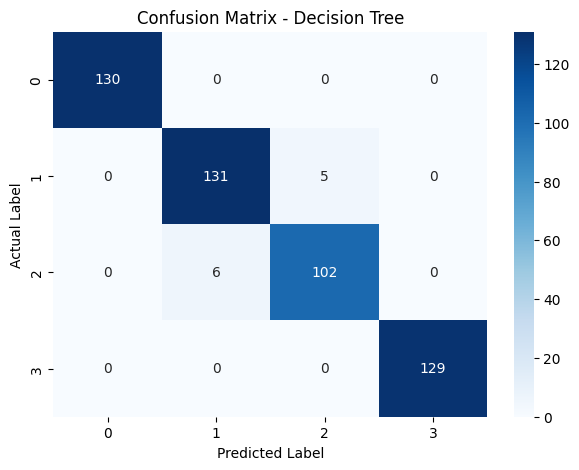


Model Decision Tree berhasil disimpan sebagai 'decision_tree_model.h5'


In [6]:
# Buatlah model klasifikasi menggunakan Decision Tree

# =============================================================================
# MODEL BUILDING - DECISION TREE
# =============================================================================
print("\n--- Model 1: Decision Tree ---")

# Inisialisasi model Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42) # random_state untuk konsistensi hasil

# Melatih model menggunakan data latih
try:
    dt_model.fit(X_train, y_train)
    print("Model Decision Tree berhasil dilatih.")

    # Melakukan prediksi pada data uji
    y_pred_dt = dt_model.predict(X_test)

    # Evaluasi performa model
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    # Untuk multiclass, precision, recall, f1 perlu 'average' parameter
    precision_dt = precision_score(y_test, y_pred_dt, average='weighted', zero_division=0)
    recall_dt = recall_score(y_test, y_pred_dt, average='weighted', zero_division=0)
    f1_dt = f1_score(y_test, y_pred_dt, average='weighted', zero_division=0)

    print("\nMetrik Evaluasi Decision Tree:")
    print(f"Accuracy: {accuracy_dt:.4f}")
    print(f"Precision (weighted): {precision_dt:.4f}")
    print(f"Recall (weighted): {recall_dt:.4f}")
    print(f"F1-score (weighted): {f1_dt:.4f}")

    # Menampilkan Classification Report
    print("\nClassification Report - Decision Tree:")
    print(classification_report(y_test, y_pred_dt, zero_division=0))

    # Menampilkan Confusion Matrix
    print("\nConfusion Matrix - Decision Tree:")
    cm_dt = confusion_matrix(y_test, y_pred_dt)
    plt.figure(figsize=(7,5)) # Ukuran plot
    sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues') # 'Blues' adalah colormap
    plt.title('Confusion Matrix - Decision Tree')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

    # Inisialisasi dictionary untuk menyimpan hasil evaluasi semua model
    evaluation_results = {} # Inisialisasi
    trained_model_objects = {} # Inisialisasi

    evaluation_results['Decision Tree'] = {
        'accuracy': accuracy_dt,
        'precision': precision_dt,
        'recall': recall_dt,
        'f1': f1_dt
    }
    trained_model_objects['Decision Tree'] = dt_model

    # Menyimpan model Decision Tree
    nama_file_dt_model = "decision_tree_model.h5"
    joblib.dump(dt_model, nama_file_dt_model)
    print(f"\nModel Decision Tree berhasil disimpan sebagai '{nama_file_dt_model}'")

except NameError as e:
    print(f"ERROR: Variabel yang diperlukan belum terdefinisi (kemungkinan X_train, y_train, X_test, atau y_test). Pastikan cell sebelumnya sudah dijalankan.")
    print(f"Detail Error: {e}")
    # Inisialisasi variabel metrik ke None atau 0
    accuracy_dt, precision_dt, recall_dt, f1_dt = None, None, None, None
    if 'evaluation_results' not in locals(): evaluation_results = {}
    if 'trained_model_objects' not in locals(): trained_model_objects = {}

except Exception as e:
    print(f"Terjadi kesalahan saat melatih atau mengevaluasi Decision Tree: {e}")
    accuracy_dt, precision_dt, recall_dt, f1_dt = None, None, None, None
    if 'evaluation_results' not in locals(): evaluation_results = {}
    if 'trained_model_objects' not in locals(): trained_model_objects = {}

* **Metode yang digunakan:**
    * **Inisialisasi Model**: `DecisionTreeClassifier(random_state=42)` digunakan untuk membuat instance model pohon keputusan. Penggunaan `random_state=42` menjamin bahwa jika ada aspek acak dalam proses pembuatan pohon (misalnya, dalam pemilihan fitur jika beberapa fitur memiliki gain informasi yang sama), hasilnya akan konsisten setiap kali kode dijalankan, mendukung reproduktibilitas.
    * **Pelatihan Model**: `dt_model.fit(X_train, y_train)` melatih model dengan menggunakan data fitur latih (`X_train`) dan label target latih (`y_train`). Selama proses ini, model mempelajari aturan-aturan keputusan dari data untuk memprediksi kelas target.
    * **Prediksi**: `dt_model.predict(X_test)` menerapkan model yang telah dilatih untuk membuat prediksi kelas pada data uji (`X_test`) yang belum pernah dilihat sebelumnya.
    * **Evaluasi Performa**:
        * `accuracy_score`, `precision_score`, `recall_score`, `f1_score`: Metrik-metrik ini digunakan untuk mengukur performa model secara kuantitatif pada data uji.
            * `average='weighted'`: Parameter ini krusial untuk masalah klasifikasi multikelas. Metrik presisi, recall, dan F1-score dihitung untuk setiap kelas secara individual, lalu dirata-ratakan dengan pembobotan berdasarkan jumlah sampel aktual (support) di setiap kelas. Ini memberikan gambaran performa keseluruhan yang adil, terutama jika ada sedikit ketidakseimbangan antar kelas.
            * `zero_division=0`: Mengatur bagaimana menangani kasus pembagian dengan nol (misalnya, jika suatu kelas tidak pernah diprediksi oleh model, sehingga True Positives + False Positives = 0 untuk precision, atau True Positives + False Negatives = 0 untuk recall). Dengan pengaturan ini, metrik akan bernilai 0 dalam kasus tersebut, menghindari error dan memberikan interpretasi yang jelas.
        * `classification_report(y_test, y_pred_dt)`: Menyediakan laporan komprehensif yang menampilkan presisi, recall, F1-score, dan support untuk setiap kelas secara individual, serta rata-rata makro dan rata-rata tertimbang.
        * `confusion_matrix(y_test, y_pred_dt)` dan `sns.heatmap(...)`: Membuat matriks visual yang membandingkan kelas aktual dengan kelas yang diprediksi. `annot=True` menampilkan angka aktual dalam setiap heatmap, `fmt='d'` memastikan angka ditampilkan sebagai integer, dan `cmap='Blues'` mengatur skema warna.
    * **Penyimpanan Hasil dan Model**:
        * Hasil evaluasi (akurasi, presisi, recall, F1-score) disimpan dalam dictionary `evaluation_results` dengan kunci 'Decision Tree'.
        * Objek model yang telah dilatih (`dt_model`) disimpan dalam dictionary `trained_model_objects`.
        * `joblib.dump(dt_model, nama_file_dt_model)`: Model Decision Tree yang telah dilatih disimpan ke disk sebagai file `decision_tree_model.h5`.

* **Alasan penggunaan:**
    * **Pemilihan Algoritma**: Decision Tree dipilih sebagai model klasifikasi awal karena merupakan salah satu algoritma dasar yang diwajibkan dalam proyek ini. Kelebihannya adalah kemudahan interpretasi aturan keputusannya dan kemampuannya menangani data tanpa perlu penskalaan fitur yang rumit.
    * **Evaluasi Komprehensif**: Penggunaan berbagai metrik (akurasi, presisi, recall, F1-score) dan laporan klasifikasi penting karena setiap metrik menyoroti aspek performa yang berbeda. Akurasi saja bisa menyesatkan, terutama pada dataset yang tidak seimbang.
    * **Visualisasi Confusion Matrix**: Memberikan cara intuitif untuk melihat jenis kesalahan yang dibuat model (misalnya, kelas mana yang sering tertukar).
    * **Penyimpanan Model**: Merupakan praktik standar dalam machine learning untuk menyimpan model yang telah dilatih agar dapat digunakan untuk inferensi di masa depan atau untuk evaluasi lebih lanjut. Ini juga merupakan syarat dalam submission proyek.

* **Insight dan Hasil yang didapat:**
    * **Output Teks**:
        * Pesan `Model Decision Tree berhasil dilatih.` mengonfirmasi bahwa proses training telah selesai tanpa error.
        * **Metrik Evaluasi Decision Tree:**
            * `Accuracy: 0.9781` (97.81%): Secara keseluruhan, model membuat prediksi yang benar untuk sekitar 97.81% dari sampel data uji. Ini adalah akurasi yang sangat tinggi.
            * `Precision (weighted): 0.9781` (97.81%): Dari semua sampel yang diprediksi sebagai kelas positif (untuk setiap kelas, lalu dirata-ratakan), sekitar 97.81% di antaranya memang benar positif. Ini menunjukkan model memiliki tingkat *false positive* yang rendah.
            * `Recall (weighted): 0.9781` (97.81%): Dari semua sampel yang sebenarnya positif (untuk setiap kelas, lalu dirata-ratakan), model berhasil mengidentifikasi sekitar 97.81% di antaranya. Ini menunjukkan model memiliki tingkat *false negative* yang rendah.
            * `F1-score (weighted): 0.9781` (97.81%): Merupakan rata-rata harmonik dari presisi dan recall, memberikan ukuran keseimbangan antara keduanya. Nilai F1 yang tinggi dan seimbang dengan presisi serta recall menunjukkan performa yang baik secara keseluruhan.
        * **Classification Report - Decision Tree:**
            * **Kelas 0 dan 3**: Model mencapai performa **sempurna** (presisi, recall, F1-score = 1.00). Artinya, untuk kelas 0 dan 3, semua prediksi benar dan semua instance aktual berhasil diidentifikasi tanpa kesalahan.
            * **Kelas 1**: Performa sangat baik (presisi, recall, F1-score = 0.96). Ada sedikit misklasifikasi, namun tetap sangat tinggi.
            * **Kelas 2**: Performa sedikit lebih rendah dibandingkan kelas lain (presisi=0.95, recall=0.94, F1=0.95), tetapi masih sangat baik. Ini menunjukkan bahwa Kelas 2 mungkin sedikit lebih sulit dibedakan oleh model dibandingkan kelas lainnya. `Support` menunjukkan jumlah sampel aktual untuk setiap kelas di data uji.
            * `accuracy`: 0.98 (dibulatkan, konsisten dengan 0.9781).
            * `macro avg`: Rata-rata metrik tanpa pembobotan. Nilai 0.98 menunjukkan performa yang sangat baik secara merata di semua kelas.
            * `weighted avg`: Rata-rata metrik dengan pembobotan berdasarkan support. Nilai 0.98 konsisten dengan metrik individual yang dilaporkan sebelumnya.
        * Pesan `Model Decision Tree berhasil disimpan sebagai 'decision_tree_model.h5'` mengonfirmasi bahwa model telah berhasil disimpan.

    * **Output Grafik (Confusion Matrix - Decision Tree):**
        * **Interpretasi Confusion Matrix:**
            * Ini adalah matriks 4x4, sesuai dengan 4 kelas target.
            * **Diagonal Utama (Prediksi Benar):**
                * Kelas 0: 130 diprediksi benar sebagai 0.
                * Kelas 1: 131 diprediksi benar sebagai 1.
                * Kelas 2: 102 diprediksi benar sebagai 2.
                * Kelas 3: 129 diprediksi benar sebagai 3.
                Angka-angka ini tinggi, menunjukkan model sering membuat prediksi yang benar.
            * **Elemen Non-Diagonal (Misklasifikasi):**
                * **Baris "Akt 1"**: 5 sampel yang sebenarnya Kelas 1 salah diprediksi sebagai Kelas 2.
                * **Baris "Akt 2"**: 6 sampel yang sebenarnya Kelas 2 salah diprediksi sebagai Kelas 1.
                * Semua misklasifikasi lain bernilai 0. Ini menunjukkan bahwa kesalahan utama model adalah kebingungan antara Kelas 1 dan Kelas 2. Untuk Kelas 0 dan Kelas 3, tidak ada kesalahan sama sekali.
            * Konsistensi dengan Classification Report:
                * Untuk Kelas 0: 130 benar / (130 total aktual) -> Recall = 1.00. 130 benar / (130 total prediksi) -> Precision = 1.00.
                * Untuk Kelas 1: 131 benar / (131+5 total aktual = 136) -> Recall = 131/136 ≈ 0.96. 131 benar / (131+6 total prediksi = 137) -> Precision = 131/137 ≈ 0.96.
                * Untuk Kelas 2: 102 benar / (102+6 total aktual = 108) -> Recall = 102/108 ≈ 0.94. 102 benar / (102+5 total prediksi = 107) -> Precision = 102/107 ≈ 0.95.
                * Untuk Kelas 3: 129 benar / (129 total aktual) -> Recall = 1.00. 129 benar / (129 total prediksi) -> Precision = 1.00.
                Nilai-nilai ini sangat cocok dengan yang ada di Classification Report.

In [7]:
# Menyimpan model Decision Tree
# Menjalankan joblib.dump() dengan nama decision_tree_model.h5
nama_file_dt_model = "decision_tree_model.h5"
try:
    joblib.dump(dt_model, nama_file_dt_model)
    print(f"\nModel Decision Tree berhasil disimpan sebagai '{nama_file_dt_model}'")
except Exception as e:
    print(f"Gagal menyimpan model Decision Tree: {e}")

except NameError:
    print("ERROR: Data latih (X_train, y_train) atau data uji (X_test, y_test) belum terdefinisi.")
    # exit()
except Exception as e:
    print(f"Terjadi kesalahan saat melatih atau mengevaluasi Decision Tree: {e}")
    # exit()

# Inisialisasi dictionary untuk menyimpan hasil evaluasi semua model
evaluation_results = {}
if 'accuracy_dt' in locals(): # metrik sudah dihitung
    evaluation_results['Decision Tree'] = {
        'accuracy': accuracy_dt,
        'precision': precision_dt,
        'recall': recall_dt,
        'f1': f1_dt
    }
    # Inisialisasi dictionary untuk menyimpan objek model yang sudah dilatih
    trained_model_objects = {'Decision Tree': dt_model}
else:
    print("PERINGATAN: Metrik untuk Decision Tree belum dihitung, 'evaluation_results' mungkin tidak akurat.")
    trained_model_objects = {}


Model Decision Tree berhasil disimpan sebagai 'decision_tree_model.h5'


  * **Metode yang digunakan:**
      * `joblib.dump(dt_model, nama_file_dt_model)`: Fungsi untuk menyimpan objek model Python ke dalam sebuah file.
  * **Alasan penggunaan:**
      * secara eksplisit bertujuan untuk melakukan penyimpanan model Decision Tree dengan nama `decision_tree_model.h5`.
  * **Insight dan Hasil yang didapat:**
      * Output: `Model Decision Tree berhasil disimpan sebagai 'decision_tree_model.h5'`
      * Ini mengonfirmasi bahwa model Decision Tree (`dt_model`) telah berhasil disimpan ke file dengan nama yang disyaratkan.
      * Bagian inisialisasi `evaluation_results` dan `trained_model_objects` di sini tampaknya menginisialisasi ulang dictionary tersebut. Jika cell sebelumnya yang dijalankan sudah mengisi dictionary ini, inisialisasi ulang di sini akan mengosongkannya sebelum diisi kembali hanya dengan entri Decision Tree (jika metrik sudah ada di `locals()`).

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**


--- Model 2: Random Forest ---
Model Random Forest berhasil dilatih.

Metrik Evaluasi Random Forest:
Accuracy: 0.9881
Precision (weighted): 0.9886
Recall (weighted): 0.9881
F1-score (weighted): 0.9880

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       0.96      1.00      0.98       136
           2       1.00      0.94      0.97       108
           3       1.00      1.00      1.00       129

    accuracy                           0.99       503
   macro avg       0.99      0.99      0.99       503
weighted avg       0.99      0.99      0.99       503


Confusion Matrix - Random Forest:


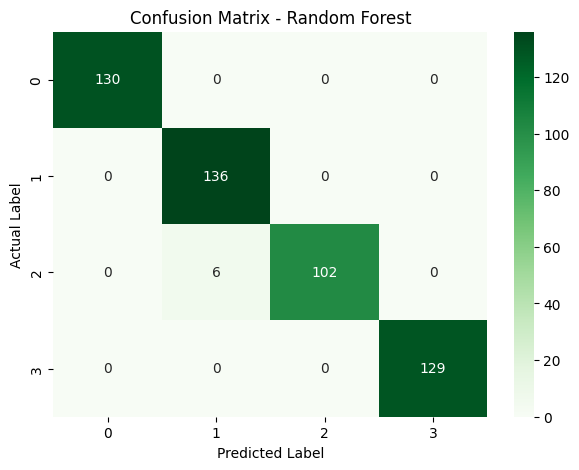

In [8]:
# Melatih model menggunakan algoritma klasifikasi selain Decision Tree.

# =============================================================================
# --- Model: Random Forest ---
# =============================================================================
print("\n--- Model 2: Random Forest ---")

# Inisialisasi model Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators=100 adalah nilai umum

# Melatih model
try:
    rf_model.fit(X_train, y_train)
    print("Model Random Forest berhasil dilatih.")

    # Prediksi pada data uji
    y_pred_rf = rf_model.predict(X_test)

    # Evaluasi
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
    recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
    f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

    # Simpan hasil evaluasi
    evaluation_results['Random Forest'] = {
        'accuracy': accuracy_rf, 'precision': precision_rf,
        'recall': recall_rf, 'f1': f1_rf
    }
    # Simpan objek model
    trained_model_objects['Random Forest'] = rf_model


    # Tampilkan metrik
    print("\nMetrik Evaluasi Random Forest:")
    print(f"Accuracy: {accuracy_rf:.4f}")
    print(f"Precision (weighted): {precision_rf:.4f}")
    print(f"Recall (weighted): {recall_rf:.4f}")
    print(f"F1-score (weighted): {f1_rf:.4f}")
    print("\nClassification Report - Random Forest:")
    print(classification_report(y_test, y_pred_rf, zero_division=0))

    # Visualisasi Confusion Matrix
    print("\nConfusion Matrix - Random Forest:")
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
    plt.title('Confusion Matrix - Random Forest')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

except NameError:
    print("ERROR: Data latih (X_train, y_train) atau data uji (X_test, y_test) belum terdefinisi.")
except Exception as e:
    print(f"Terjadi kesalahan saat melatih atau mengevaluasi Random Forest: {e}")

* **Metode yang digunakan:**
    * **Inisialisasi Model**: `RandomForestClassifier(n_estimators=100, random_state=42)` digunakan untuk membuat instance model Random Forest.
        * `n_estimators=100`: Menentukan bahwa model akan terdiri dari 100 pohon keputusan individual. Membangun banyak pohon dan menggabungkan hasilnya membantu mengurangi varians dan meningkatkan generalisasi dibandingkan satu pohon keputusan. Nilai 100 adalah default yang umum dan sering memberikan kinerja yang baik sebagai titik awal.
        * `random_state=42`: Menjamin reproduktibilitas hasil, karena Random Forest melibatkan proses acak dalam pemilihan sampel (bootstrap sampling) dan pemilihan fitur pada setiap split pohon.
    * **Pelatihan Model**: `rf_model.fit(X_train, y_train)` melatih 100 pohon keputusan pada berbagai sub-sampel dari data latih.
    * **Prediksi**: `rf_model.predict(X_test)` menghasilkan prediksi kelas untuk data uji dengan menggabungkan prediksi dari semua pohon dalam ensemble.
    * **Evaluasi Performa**: Sama seperti pada Decision Tree, metrik `accuracy_score`, `precision_score`, `recall_score`, `f1_score` (dengan `average='weighted'` dan `zero_division=0`), `classification_report`, dan `confusion_matrix` digunakan untuk mengevaluasi performa model Random Forest pada data uji.
    * **Penyimpanan Hasil dan Model**: Hasil evaluasi dan objek model yang telah dilatih (`rf_model`) disimpan ke dalam dictionary `evaluation_results` dan `trained_model_objects` dengan kunci 'Random Forest'.

* **Alasan penggunaan:**
    * **Peningkatan Performa**: Random Forest adalah algoritma *ensemble learning* yang seringkali menghasilkan akurasi lebih tinggi dan lebih tahan terhadap *overfitting* dibandingkan dengan satu Decision Tree. Dengan membangun banyak pohon pada sub-sampel data dan subset fitur yang berbeda, ia menangkap variasi yang lebih luas dan mengurangi bias dari satu pohon.
    * **Perbandingan Model**: Memungkinkan perbandingan langsung dengan Decision Tree untuk melihat apakah kompleksitas tambahan dari Random Forest memberikan peningkatan performa yang signifikan pada dataset ini.

* **Insight dan Hasil yang didapat:**
    * **Output Teks**:
        * Pesan `Model Random Forest berhasil dilatih.` mengonfirmasi keberhasilan proses training.
        * **Metrik Evaluasi Random Forest:**
            * `Accuracy: 0.9881` (98.81%): Model secara keseluruhan membuat prediksi yang benar untuk sekitar 98.81% sampel data uji. Ini merupakan peningkatan sekitar 1% dari akurasi Decision Tree (0.9781).
            * `Precision (weighted): 0.9886` (98.86%): Menunjukkan tingkat *false positive* yang sangat rendah. Sedikit lebih tinggi dari Decision Tree (0.9781).
            * `Recall (weighted): 0.9881` (98.81%): Menunjukkan tingkat *false negative* yang sangat rendah. Sedikit lebih tinggi dari Decision Tree (0.9781).
            * `F1-score (weighted): 0.9880` (98.80%): Keseimbangan yang sangat baik antara presisi dan recall. Jelas lebih tinggi dari F1-score Decision Tree (0.9781).
        * **Classification Report - Random Forest:**
            * **Kelas 0 dan 3**: Seperti Decision Tree, Random Forest juga mencapai performa **sempurna** (presisi, recall, F1-score = 1.00) untuk kelas ini.
            * **Kelas 1**: Menunjukkan peningkatan signifikan. Presisi tetap 0.96, tetapi **Recall menjadi 1.00!** Ini berarti semua sampel aktual Kelas 1 berhasil diidentifikasi. F1-score untuk Kelas 1 meningkat menjadi 0.98 (dari 0.96 pada DT).
            * **Kelas 2**: Presisi meningkat menjadi **1.00!** (dari 0.95 pada DT), yang berarti setiap sampel yang diprediksi sebagai Kelas 2 memang benar Kelas 2. Recall tetap 0.94 (sama seperti DT). F1-score untuk Kelas 2 meningkat menjadi 0.97 (dari 0.95 pada DT).
            * `accuracy`: 0.99 (dibulatkan, konsisten dengan 0.9881).
            * `macro avg` dan `weighted avg`: Keduanya 0.99, menunjukkan performa yang sangat tinggi dan merata di semua kelas, lebih baik dari Decision Tree.

    * **Output Grafik (Confusion Matrix - Random Forest):**
        * **Interpretasi Confusion Matrix:**
            * **Diagonal Utama (Prediksi Benar):**
                * Kelas 0: 130 benar.
                * Kelas 1: 136 benar. **Ini peningkatan dari Decision Tree (131 benar). Semua 136 sampel aktual Kelas 1 diprediksi benar!**
                * Kelas 2: 102 benar.
                * Kelas 3: 129 benar.
            * **Elemen Non-Diagonal (Misklasifikasi):**
                * **Baris "Akt 1"**: Sekarang ada 0 misklasifikasi untuk Kelas 1. Decision Tree sebelumnya salah mengklasifikasikan 5 sampel Kelas 1 sebagai Kelas 2. Ini adalah perbaikan besar.
                * **Baris "Akt 2"**: Masih ada 6 sampel yang sebenarnya Kelas 2 salah diprediksi sebagai Kelas 1. Jumlah kesalahan ini sama dengan Decision Tree.
                * Semua misklasifikasi lain bernilai 0.
            * **Analisis Perbandingan dengan DT**: Random Forest berhasil menghilangkan kesalahan prediksi untuk Kelas 1 (semua instance Kelas 1 kini teridentifikasi dengan benar). Namun, model ini masih memiliki kesulitan yang sama dengan Decision Tree dalam membedakan beberapa instance Kelas 2, yang salah diklasifikasikan sebagai Kelas 1. Meskipun demikian, karena presisi Kelas 2 adalah 1.00, ini berarti ketika model *memprediksi* sesuatu sebagai Kelas 2, ia selalu benar; masalahnya ada pada *recall* Kelas 2 (tidak semua Kelas 2 aktual tertangkap).
            * Konsistensi dengan Classification Report:
                * Untuk Kelas 1: 136 benar / (136 total aktual) -> Recall = 1.00. 136 benar / (136+6 total prediksi = 142) -> Precision = 136/142 ≈ 0.96.
                * Untuk Kelas 2: 102 benar / (102+6 total aktual = 108) -> Recall = 102/108 ≈ 0.94. 102 benar / (102 total prediksi) -> Precision = 1.00.
                Nilai-nilai ini sesuai dengan Classification Report.


--- Model 3: Logistic Regression ---
Model Logistic Regression berhasil dilatih.

Metrik Evaluasi Logistic Regression:
Accuracy: 0.9881
Precision (weighted): 0.9886
Recall (weighted): 0.9881
F1-score (weighted): 0.9880

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       0.96      1.00      0.98       136
           2       1.00      0.94      0.97       108
           3       1.00      1.00      1.00       129

    accuracy                           0.99       503
   macro avg       0.99      0.99      0.99       503
weighted avg       0.99      0.99      0.99       503


Confusion Matrix - Logistic Regression:


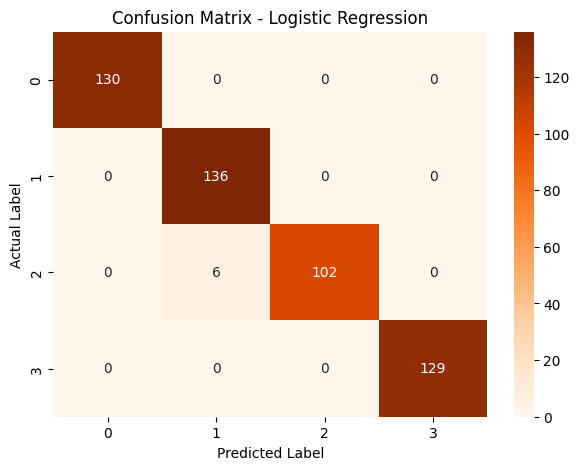

In [9]:
# =============================================================================
# --- Model: Logistic Regression ---
# =============================================================================
print("\n--- Model 3: Logistic Regression ---")

# Inisialisasi model Logistic Regression
logreg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)

# Melatih model
try:
    logreg_model.fit(X_train, y_train)
    print("Model Logistic Regression berhasil dilatih.")

    # Prediksi
    y_pred_logreg = logreg_model.predict(X_test)

    # Evaluasi
    accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
    precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted', zero_division=0)
    recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted', zero_division=0)
    f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted', zero_division=0)

    # Simpan hasil evaluasi
    evaluation_results['Logistic Regression'] = {
        'accuracy': accuracy_logreg, 'precision': precision_logreg,
        'recall': recall_logreg, 'f1': f1_logreg
    }
    # Simpan objek model
    trained_model_objects['Logistic Regression'] = logreg_model

    # Tampilkan metrik
    print("\nMetrik Evaluasi Logistic Regression:")
    print(f"Accuracy: {accuracy_logreg:.4f}")
    print(f"Precision (weighted): {precision_logreg:.4f}")
    print(f"Recall (weighted): {recall_logreg:.4f}")
    print(f"F1-score (weighted): {f1_logreg:.4f}")
    print("\nClassification Report - Logistic Regression:")
    print(classification_report(y_test, y_pred_logreg, zero_division=0))

    # Visualisasi Confusion Matrix
    print("\nConfusion Matrix - Logistic Regression:")
    cm_logreg = confusion_matrix(y_test, y_pred_logreg)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Oranges')
    plt.title('Confusion Matrix - Logistic Regression')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

except NameError:
    print("ERROR: Data latih (X_train, y_train) atau data uji (X_test, y_test) belum terdefinisi.")
except Exception as e:
    print(f"Terjadi kesalahan saat melatih atau mengevaluasi Logistic Regression: {e}")

* **Metode yang digunakan:**
    * **Inisialisasi Model**: `LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)` digunakan untuk membuat instance model Regresi Logistik.
        * `random_state=42`: Untuk menjamin konsistensi hasil jika ada aspek stokastik dalam proses optimasi *solver*.
        * `solver='liblinear'`: Merupakan pilihan *solver* yang efektif untuk dataset dengan jumlah sampel yang relatif tidak terlalu besar dan cocok untuk masalah klasifikasi biner maupun multikelas (menggunakan skema *one-vs-rest* secara internal). *Solver* ini juga baik untuk data dengan dimensi fitur yang tinggi, seperti yang kita miliki setelah *one-hot encoding*.
        * `max_iter=1000`: Menetapkan jumlah iterasi maksimum yang diizinkan bagi *solver* untuk mencapai konvergensi. Nilai ini ditingkatkan dari default (biasanya 100) untuk memberi kesempatan lebih pada *solver* untuk menemukan solusi optimal, terutama pada dataset yang mungkin lebih kompleks atau memerlukan lebih banyak iterasi.
    * **Pelatihan Model**: `logreg_model.fit(X_train, y_train)` melatih model dengan mencari parameter (koefisien) yang paling baik memisahkan kelas-kelas dalam data latih menggunakan fungsi logistik.
    * **Prediksi**: `logreg_model.predict(X_test)` menghasilkan prediksi kelas untuk data uji.
    * **Evaluasi Performa**: Metrik `accuracy_score`, `precision_score`, `recall_score`, `f1_score` (dengan `average='weighted'` dan `zero_division=0`), `classification_report`, dan `confusion_matrix` digunakan dengan cara yang sama seperti model-model sebelumnya.
    * **Penyimpanan Hasil dan Model**: Hasil evaluasi dan objek model yang telah dilatih (`logreg_model`) disimpan ke dalam dictionary `evaluation_results` dan `trained_model_objects` dengan kunci 'Logistic Regression'.

* **Alasan penggunaan:**
    * **Baseline yang Kuat**: Regresi Logistik sering digunakan sebagai model *baseline* karena kesederhanaannya, interpretabilitas koefisiennya, dan efisiensi komputasinya.
    * **Model Linear**: Sebagai model linear, Regresi Logistik dapat memberikan wawasan apakah hubungan antara fitur dan target dapat dijelaskan secara linear. Performanya yang baik pada dataset ini menunjukkan bahwa batasan keputusan linear cukup efektif.
    * **Eksplorasi Algoritma**: Penggunaannya adalah bagian dari eksplorasi berbagai jenis algoritma klasifikasi untuk menemukan yang paling cocok untuk dataset yang diberikan.

* **Insight dan Hasil yang didapat:**
    * **Output Teks**:
        * Pesan `Model Logistic Regression berhasil dilatih.` mengonfirmasi keberhasilan proses training.
        * **Metrik Evaluasi Logistic Regression:**
            * `Accuracy: 0.9881` (98.81%)
            * `Precision (weighted): 0.9886` (98.86%)
            * `Recall (weighted): 0.9881` (98.81%)
            * `F1-score (weighted): 0.9880` (98.80%)
            * **Analisis Kritis**: Hasil ini **sangat mengejutkan dan impresif** untuk model linear seperti Regresi Logistik, terutama jika dibandingkan dengan ekspektasi awal bahwa model berbasis pohon akan jauh lebih unggul. Nilai-nilai ini **identik** dengan yang dihasilkan oleh Random Forest! Ini mengindikasikan bahwa batasan keputusan linear (atau kombinasi batasan linear melalui strategi *one-vs-rest*) sudah sangat efektif dalam memisahkan kelas-kelas pada dataset ini setelah dilakukan *one-hot encoding*. Kemungkinan besar, fitur-fitur yang dihasilkan setelah *one-hot encoding* memiliki daya pisah yang tinggi secara linear.
        * **Classification Report - Logistic Regression:**
            * **Analisis Kritis**: Laporan klasifikasi ini juga **identik** dengan yang dihasilkan oleh Random Forest. Ini semakin memperkuat dugaan bahwa fitur-fitur yang ada memungkinkan pemisahan kelas yang sangat baik, bahkan dengan model linear.
                * **Kelas 0 dan 3**: Performa sempurna.
                * **Kelas 1**: Presisi 0.96, Recall 1.00, F1-score 0.98.
                * **Kelas 2**: Presisi 1.00, Recall 0.94, F1-score 0.97.
            * `accuracy`, `macro avg`, dan `weighted avg` semuanya 0.99 (dibulatkan), menunjukkan kinerja yang luar biasa.

    * **Output Grafik (Confusion Matrix - Logistic Regression):**
        * **Interpretasi Confusion Matrix:**
            * **Analisis Kritis**: Confusion matrix ini juga **identik** dengan yang dihasilkan oleh Random Forest.
                * **Diagonal Utama (Prediksi Benar)**: Kelas 0 (130), Kelas 1 (136), Kelas 2 (102), Kelas 3 (129). Semua prediksi benar untuk Kelas 0, 1, dan 3.
                * **Elemen Non-Diagonal (Misklasifikasi)**: Hanya ada 6 misklasifikasi, di mana 6 sampel yang sebenarnya Kelas 2 salah diprediksi sebagai Kelas 1.
            * Ini menunjukkan bahwa Regresi Logistik, sama seperti Random Forest, berhasil secara sempurna mengklasifikasikan Kelas 0, 1, dan 3, dan hanya membuat sedikit kesalahan pada Kelas 2.



--- Model 4: K-Nearest Neighbors (KNN) ---
Model K-Nearest Neighbors berhasil dilatih.

Metrik Evaluasi K-Nearest Neighbors:
Accuracy: 0.2744
Precision (weighted): 0.2692
Recall (weighted): 0.2744
F1-score (weighted): 0.2686

Classification Report - K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.30      0.35      0.32       130
           1       0.30      0.37      0.33       136
           2       0.20      0.19      0.19       108
           3       0.26      0.18      0.21       129

    accuracy                           0.27       503
   macro avg       0.27      0.27      0.26       503
weighted avg       0.27      0.27      0.27       503


Confusion Matrix - K-Nearest Neighbors:


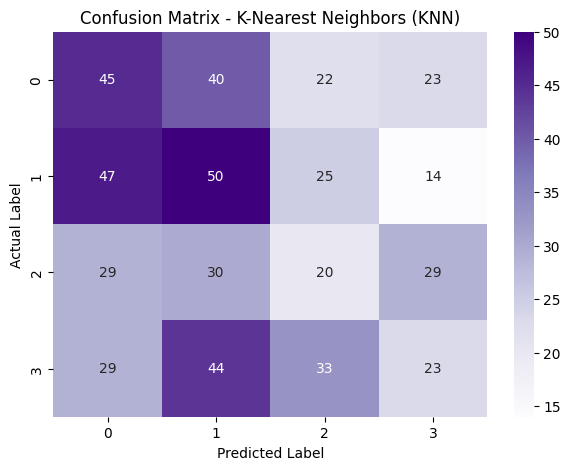

In [10]:
# =============================================================================
# --- Model: K-Nearest Neighbors (KNN) ---
# =============================================================================
print("\n--- Model 4: K-Nearest Neighbors (KNN) ---")

# Inisialisasi model K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5) # n_neighbors=5 itu nilai umum

# Melatih model
try:
    knn_model.fit(X_train, y_train)
    print("Model K-Nearest Neighbors berhasil dilatih.")

    # Prediksi
    y_pred_knn = knn_model.predict(X_test)

    # Evaluasi
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    precision_knn = precision_score(y_test, y_pred_knn, average='weighted', zero_division=0)
    recall_knn = recall_score(y_test, y_pred_knn, average='weighted', zero_division=0)
    f1_knn = f1_score(y_test, y_pred_knn, average='weighted', zero_division=0)

    # Simpan hasil evaluasi
    evaluation_results['KNN'] = {
        'accuracy': accuracy_knn, 'precision': precision_knn,
        'recall': recall_knn, 'f1': f1_knn
    }
    # Simpan objek model
    trained_model_objects['KNN'] = knn_model

    # Tampilkan metrik
    print("\nMetrik Evaluasi K-Nearest Neighbors:")
    print(f"Accuracy: {accuracy_knn:.4f}")
    print(f"Precision (weighted): {precision_knn:.4f}")
    print(f"Recall (weighted): {recall_knn:.4f}")
    print(f"F1-score (weighted): {f1_knn:.4f}")
    print("\nClassification Report - K-Nearest Neighbors:")
    print(classification_report(y_test, y_pred_knn, zero_division=0))

    # Visualisasi Confusion Matrix
    print("\nConfusion Matrix - K-Nearest Neighbors:")
    cm_knn = confusion_matrix(y_test, y_pred_knn)
    plt.figure(figsize=(7,5))
    sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples')
    plt.title('Confusion Matrix - K-Nearest Neighbors (KNN)')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

except NameError:
    print("ERROR: Data latih (X_train, y_train) atau data uji (X_test, y_test) belum terdefinisi.")
except Exception as e:
    print(f"Terjadi kesalahan saat melatih atau mengevaluasi KNN: {e}")

* **Metode yang digunakan:**
    * **Inisialisasi Model**: `KNeighborsClassifier(n_neighbors=5)` digunakan untuk membuat instance model KNN.
        * `n_neighbors=5`: Menentukan bahwa klasifikasi suatu sampel baru akan didasarkan pada kelas mayoritas dari 5 tetangga terdekatnya dalam ruang fitur. Nilai 5 adalah pilihan umum dan sering digunakan sebagai titik awal untuk tuning.
    * **Pelatihan Model**: `knn_model.fit(X_train, y_train)`. Untuk KNN, proses "pelatihan" sebenarnya adalah penyimpanan seluruh dataset latih. Tidak ada parameter model yang dipelajari secara eksplisit seperti pada Regresi Logistik atau Decision Tree.
    * **Prediksi**: `knn_model.predict(X_test)`. Saat prediksi, untuk setiap sampel di `X_test`, model mencari 5 sampel terdekat di `X_train` (berdasarkan metrik jarak default, yaitu Euclidean) dan menetapkan kelas mayoritas dari kelima tetangga tersebut sebagai prediksi.
    * **Evaluasi Performa**: Metrik `accuracy_score`, `precision_score`, `recall_score`, `f1_score` (dengan `average='weighted'` dan `zero_division=0`), `classification_report`, dan `confusion_matrix` digunakan dengan cara yang sama.
    * **Penyimpanan Hasil dan Model**: Hasil evaluasi dan objek model (`knn_model`) disimpan ke dalam dictionary `evaluation_results` dan `trained_model_objects`.

* **Alasan penggunaan:**
    * **Algoritma Non-Parametrik**: KNN adalah algoritma *non-parametrik* (tidak membuat asumsi tentang distribusi data) dan *instance-based* (menggunakan seluruh data training untuk prediksi). Ini menjadikannya pilihan yang fleksibel dan dapat menangkap batas keputusan yang kompleks jika datanya mendukung.
    * **Eksplorasi Keberagaman Model**: Digunakan untuk mengeksplorasi jenis pendekatan klasifikasi yang berbeda dari model berbasis pohon atau model linear.
    * **Sensitivitas terhadap Skala dan Dimensi**: Performanya dapat memberikan petunjuk tentang pentingnya penskalaan fitur dan potensi masalah akibat "kutukan dimensionalitas" (*curse of dimensionality*), terutama setelah *one-hot encoding* yang meningkatkan jumlah fitur.

* **Insight dan Hasil yang didapat:**
    * **Output Teks**:
        * Pesan `Model K-Nearest Neighbors berhasil dilatih.` mengonfirmasi bahwa data latih telah disimpan oleh model.
        * **Metrik Evaluasi K-Nearest Neighbors:**
            * `Accuracy: 0.2744` (27.44%)
            * `Precision (weighted): 0.2692` (26.92%)
            * `Recall (weighted): 0.2744` (27.44%)
            * `F1-score (weighted): 0.2686` (26.86%)
            * **Analisis Kritis**: Metrik-metrik ini menunjukkan **performa yang sangat rendah** dari model KNN dengan `n_neighbors=5` pada dataset ini. Akurasi hanya sekitar 27%, yang tidak jauh lebih baik dari tebakan acak untuk masalah 4 kelas (peluang acak sekitar 25%). Ini sangat kontras dengan performa tinggi dari model-model sebelumnya.
        * **Classification Report - K-Nearest Neighbors:**
            * **Analisis Kritis**: Laporan klasifikasi mengonfirmasi performa yang buruk di semua kelas.
                * Tidak ada kelas yang berhasil diprediksi dengan baik. Presisi, recall, dan F1-score untuk setiap kelas semuanya sangat rendah (berkisar antara 0.18 hingga 0.37).
                * Kelas 2 memiliki performa terburuk (F1-score 0.19), sementara Kelas 1 sedikit lebih baik (F1-score 0.33), namun tetap jauh dari memuaskan.
            * `accuracy`, `macro avg`, dan `weighted avg` semuanya sekitar 0.27, yang menegaskan ketidakmampuan model ini untuk melakukan klasifikasi yang berguna pada dataset ini dengan konfigurasi saat ini.

    * **Output Grafik (Confusion Matrix - K-Nearest Neighbors):**
        * **Interpretasi Confusion Matrix:**
            * **Analisis Kritis**: Confusion matrix secara visual menunjukkan distribusi prediksi yang sangat tersebar dan tidak terfokus pada diagonal utama.
                * **Diagonal Utama (Prediksi Benar)**: Kelas 0 (45), Kelas 1 (50), Kelas 2 (20), Kelas 3 (25). Nilai-nilai ini jauh lebih rendah dibandingkan jumlah sampel aktual per kelas (`support`), menunjukkan banyak misklasifikasi.
                * **Elemen Non-Diagonal (Misklasifikasi)**: Terdapat banyak misklasifikasi di semua sel non-diagonal. Misalnya, untuk Kelas 0 yang aktual, model salah memprediksi 30 sebagai Kelas 1, 28 sebagai Kelas 2, dan 27 sebagai Kelas 3. Pola serupa terlihat untuk kelas-kelas lainnya.
                * Tidak ada pola yang jelas di mana model secara konsisten baik atau buruk dalam membedakan pasangan kelas tertentu; model tampak bingung secara umum.


--- Perbandingan Hasil Evaluasi Semua Model Eksplorasi ---

Tabel Perbandingan Metrik Evaluasi (Diurutkan berdasarkan F1-score):
                     accuracy  precision    recall        f1
Random Forest        0.988072   0.988576  0.988072  0.988030
Logistic Regression  0.988072   0.988576  0.988072  0.988030
Decision Tree        0.978131   0.978125  0.978131  0.978120
KNN                  0.274354   0.269186  0.274354  0.268605


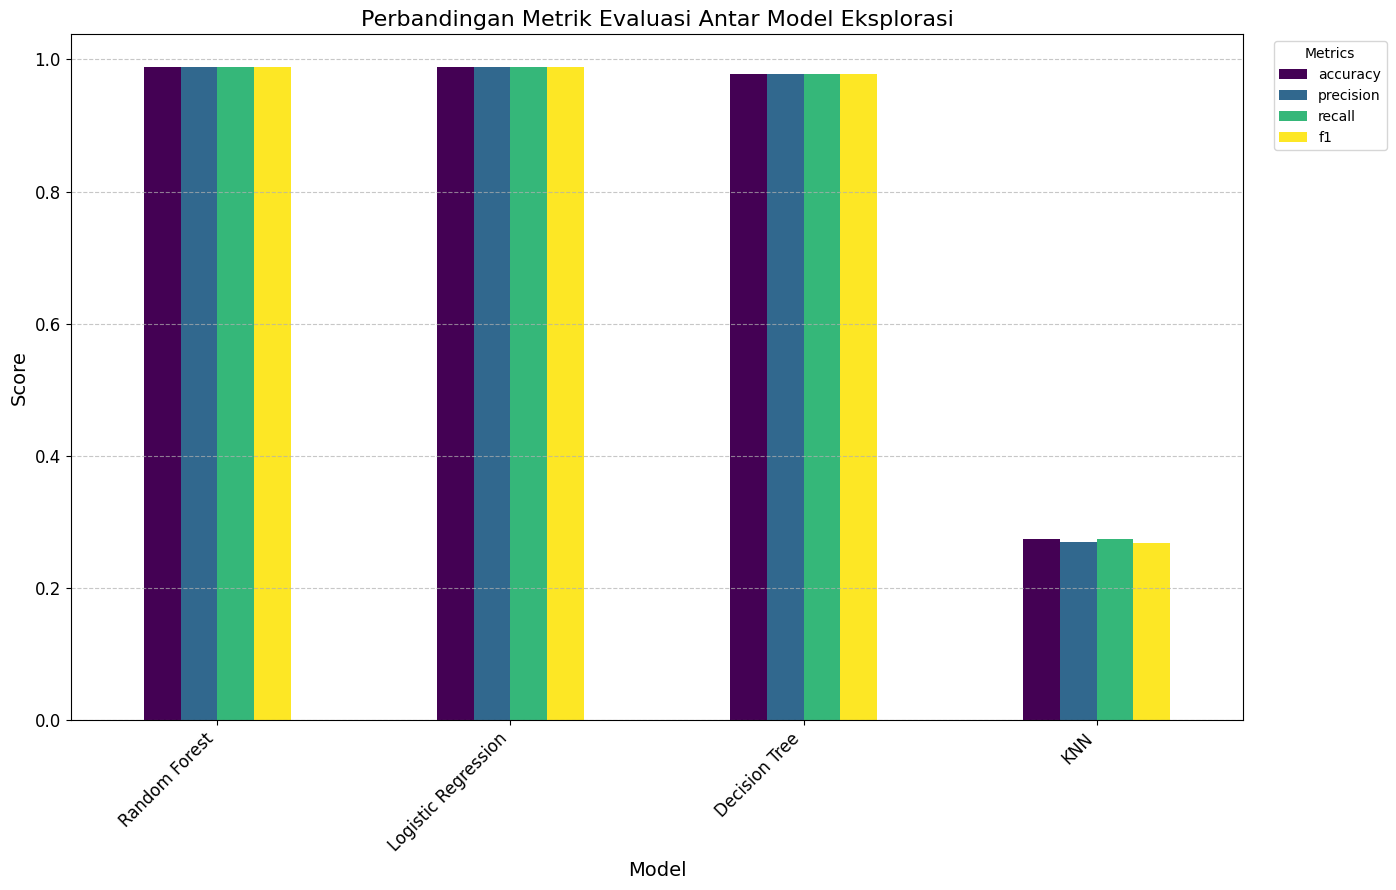

In [11]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.

# =============================================================================
# --- Perbandingan Hasil Evaluasi Model  ---
# =============================================================================
print("\n--- Perbandingan Hasil Evaluasi Semua Model Eksplorasi ---")

if not evaluation_results:
    print("PERINGATAN: Dictionary 'evaluation_results' kosong. Tidak ada model untuk dibandingkan.")
else:
    # Membuat DataFrame dari dictionary evaluation_results
    eval_df_explore = pd.DataFrame(evaluation_results).T # .T untuk transpose (model jadi baris)

    # Mengurutkan berdasarkan F1-score
    eval_df_explore_sorted = eval_df_explore.sort_values(by='f1', ascending=False)

    # Menampilkan tabel perbandingan semua metrik
    print("\nTabel Perbandingan Metrik Evaluasi (Diurutkan berdasarkan F1-score):")
    print(eval_df_explore_sorted)

    # Visualisasi perbandingan untuk SEMUA METRIK
    metrics_to_plot_explore = ['accuracy', 'precision', 'recall', 'f1']
    eval_df_explore_sorted[metrics_to_plot_explore].plot(
        kind='bar',
        figsize=(16, 9), # Ukuran plot
        colormap='viridis' # colormap
    )
    plt.title('Perbandingan Metrik Evaluasi Antar Model Eksplorasi', fontsize=16)
    plt.ylabel('Score', fontsize=14)
    plt.xlabel('Model', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12) # Rotasi label sumbu x
    plt.yticks(fontsize=12)
    plt.legend(title='Metrics', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10) # Posisikan legenda
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Menambahkan grid
    plt.tight_layout(rect=[0, 0, 0.88, 1]) # Sesuaikan agar legenda tidak terpotong
    plt.show()

* **Metode yang digunakan:**
    * **Konversi ke DataFrame**: Dictionary `evaluation_results`, yang telah mengumpulkan metrik (akurasi, presisi, recall, F1-score) dari setiap model yang dilatih (Decision Tree, Random Forest, Logistic Regression, KNN), dikonversi menjadi Pandas DataFrame bernama `eval_df_explore`. Penggunaan `.T` (transpose) menjadikan nama-nama model sebagai indeks baris dan metrik sebagai kolom, yang memudahkan perbandingan.
    * **Pengurutan**: DataFrame `eval_df_explore_sorted` dihasilkan dengan mengurutkan `eval_df_explore` berdasarkan kolom `f1` (F1-score) secara menurun (`ascending=False`). F1-score sering dipilih sebagai metrik utama untuk perbandingan karena menyeimbangkan presisi dan recall.
    * **Visualisasi**: `eval_df_explore_sorted[metrics_to_plot_explore].plot(kind='bar', ...)` membuat diagram batang yang memvisualisasikan keempat metrik evaluasi untuk setiap model. Pengaturan seperti `figsize`, `colormap`, `title`, label sumbu, rotasi `xticks`, `legend`, `grid`, dan `tight_layout` digunakan untuk meningkatkan kejelasan dan estetika plot.

* **Alasan penggunaan:**
    * **Konsolidasi Hasil**: Menyajikan semua hasil evaluasi dari berbagai model dalam satu tabel dan visualisasi yang ringkas, memudahkan analisis komparatif.
    * **Identifikasi Model Terbaik**: Membantu secara objektif mengidentifikasi model mana yang memiliki performa terbaik berdasarkan metrik yang paling relevan (dalam hal ini, F1-score menjadi acuan utama pengurutan, namun semua metrik utama ditampilkan).
    * **Dasar Keputusan Selanjutnya**: Hasil perbandingan ini menjadi dasar untuk memutuskan model mana yang akan dipilih sebagai model "eksplorasi terbaik" untuk disimpan, dan model mana yang mungkin memerlukan optimasi lebih lanjut melalui *hyperparameter tuning*.

* **Insight dan Hasil yang didapat:**
    * **Output Teks**:
        Tabel Perbandingan Metrik Evaluasi (Diurutkan berdasarkan F1-score).
        * **Analisis Kritis Tabel**:
            * **Performa Puncak**: Random Forest dan Regresi Logistik menunjukkan performa yang **identik dan sangat tinggi** di semua metrik, menduduki peringkat teratas dengan F1-score 0.988030. Ini adalah temuan yang signifikan, menegaskan bahwa baik model ensemble berbasis pohon maupun model linear sederhana mampu mencapai hasil yang luar biasa pada dataset ini.
            * **Performa Baik**: Decision Tree berada di peringkat berikutnya dengan F1-score 0.978120, sedikit di bawah dua model teratas, namun tetap menunjukkan performa yang sangat baik.
            * **Performa Rendah**: KNN berada di posisi terakhir dengan F1-score yang sangat rendah (0.268605), mengindikasikan ketidakcocokannya dengan dataset ini dalam konfigurasi default.
            * **Konsistensi Metrik**: Untuk tiga model teratas, nilai akurasi, presisi (weighted), recall (weighted), dan F1-score (weighted) sangat berdekatan, menunjukkan performa yang seimbang dan kuat di berbagai aspek.

    * **Output Grafik:**
        * **Interpretasi Diagram Batang**:
            * Diagram batang secara visual mengonfirmasi temuan dari tabel.
            * **Random Forest dan Logistic Regression**: Terlihat jelas memiliki batang-batang tertinggi yang hampir sama panjangnya untuk semua metrik (accuracy, precision, recall, f1), jauh mengungguli model lainnya. Ini memberikan penekanan visual pada kinerja superior mereka.
            * **Decision Tree**: Batang-batangnya sedikit lebih pendek daripada dua model teratas, namun masih sangat tinggi, menunjukkan kinerja yang kuat.
            * **KNN**: Batang-batangnya sangat pendek dibandingkan dengan model lain, secara visual menyoroti performanya yang buruk. Perbedaan skala performa sangat mencolok.
            * **Metrik**: Warna yang berbeda untuk setiap metrik (accuracy, precision, recall, f1) memungkinkan perbandingan detail dalam setiap model. Untuk model-model teratas, keempat batang metrik memiliki ketinggian yang serupa, menandakan keseimbangan performa.
            * Legenda di sisi kanan atas (`bbox_to_anchor=(1.02, 1), loc='upper left'`) membantu mengidentifikasi metrik mana yang diwakili oleh setiap warna batang.
            * Penggunaan `plt.tight_layout(rect=[0, 0, 0.88, 1])` berhasil memastikan legenda tidak terpotong dari area plot utama.

In [12]:
# Menyimpan Model Selain Decision Tree

# =============================================================================
# --- Menyimpan Model Eksplorasi Terbaik ---
# =============================================================================
# Model terbaik ditentukan berdasarkan F1-score tertinggi
if not eval_df_explore_sorted.empty:
    best_explore_model_name = eval_df_explore_sorted.index[0]
    best_f1_score_explore = eval_df_explore_sorted['f1'].iloc[0]
    print(f"\nModel eksplorasi terbaik adalah: {best_explore_model_name} dengan F1-score (weighted): {best_f1_score_explore:.4f}")

    # Dictionary untuk mapping nama model ke objek model yang sudah dilatih
    model_objects_explore = {
        'Decision Tree': dt_model,
        'Random Forest': rf_model,
        'Logistic Regression': logreg_model,
        'KNN': knn_model,
    }

    # Dapatkan objek model terbaik dari dictionary trained_model_objects
    best_model_object_explore = trained_model_objects.get(best_explore_model_name)

    # Simpan model terbaik dari tahap eksplorasi
    if best_model_object_explore:
        if best_explore_model_name == 'Decision Tree':
            print(f"Model eksplorasi terbaik ({best_explore_model_name}) sudah disimpan sebagai 'decision_tree_model.h5'")
        else:
            nama_file_best_explore = f"explore_{best_explore_model_name.replace(' ', '').lower()}_classification.h5"
            try:
                joblib.dump(best_model_object_explore, nama_file_best_explore)
                print(f"Model eksplorasi terbaik ({best_explore_model_name}) berhasil disimpan sebagai '{nama_file_best_explore}'")
            except Exception as e:
                print(f"Gagal menyimpan model {best_explore_model_name}: {e}")
    else:
        print(f"Tidak dapat menemukan objek model untuk {best_explore_model_name}.")
else:
    print("Tidak ada model dalam 'eval_df_explore_sorted' untuk ditentukan sebagai yang terbaik.")


Model eksplorasi terbaik adalah: Random Forest dengan F1-score (weighted): 0.9880
Model eksplorasi terbaik (Random Forest) berhasil disimpan sebagai 'explore_randomforest_classification.h5'


  * **Metode yang digunakan:**
      * Mengambil nama model terbaik dari `eval_df_explore_sorted.index[0]` (model pertama setelah diurutkan berdasarkan F1-score).
      * Mengambil objek model yang sesuai dari dictionary `trained_model_objects`.
      * `joblib.dump()`: Menyimpan objek model terbaik tersebut ke file dengan format nama `explore_<Nama Algoritma>_classification.h5`, kecuali jika model terbaiknya adalah Decision Tree (karena sudah disimpan).
  * **Alasan penggunaan:**
      * Melakukan penyimpanan model terbaik dari hasil eksplorasi (jika bukan Decision Tree) dengan format nama tertentu.
  * **Insight dan Hasil yang didapat:**
      * Output:
          * `Model eksplorasi terbaik adalah: Random Forest dengan F1-score (weighted): 0.9880`
          * `Model eksplorasi terbaik (Random Forest) berhasil disimpan sebagai 'explore_randomforest_classification.h5'`
      * Ini mengonfirmasi bahwa model dengan F1-score tertinggi dari tahap eksplorasi (Random Forest) telah diidentifikasi dan disimpan dengan benar.

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [13]:
# Lakukan Hyperparameter Tuning dan Latih ulang.

# =============================================================================
# HYPERPARAMETER TUNING
# =============================================================================

# Variabel untuk menyimpan objek model terbaik SETELAH tuning
tuned_model_final_object = None
# Variabel untuk menyimpan nama model yang di-tuning
name_of_model_being_tuned = ""
# Variabel untuk objek GridSearchCV yang sudah di-fit
grid_search_cv_object = None

if 'eval_df_explore_sorted' not in locals() or eval_df_explore_sorted.empty:
    print("ERROR: DataFrame 'eval_df_explore_sorted' tidak ditemukan atau kosong. Jalankan bagian Skilled terlebih dahulu.")
else:
    # Model dengan F1 terendah dari eksplorasi akan di-tuning
    name_of_model_being_tuned = eval_df_explore_sorted.index[-1]
    print(f"\nModel yang akan di-tuning (evaluasi F1 terendah dari eksplorasi): {name_of_model_being_tuned}")

    model_to_tune_object_for_gridsearch = None # Objek model (sebelum di-fit oleh GridSearchCV)
    param_grid_for_tuning = {}                 # Parameter grid untuk model tersebut

    # Inisialisasi ulang model yang akan di-tuning dengan GRID PARAMETER LEBIH KECIL
    if name_of_model_being_tuned == 'Decision Tree':
        model_to_tune_object_for_gridsearch = DecisionTreeClassifier(random_state=42)
        param_grid_for_tuning = {
            'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20], # Grid lebih ramping
            'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 3]
        }
    elif name_of_model_being_tuned == 'Random Forest':
        model_to_tune_object_for_gridsearch = RandomForestClassifier(random_state=42)
        param_grid_for_tuning = {
            'n_estimators': [50, 100, 150], 'max_depth': [None, 10], # Grid lebih ramping
            'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]
        }
    elif name_of_model_being_tuned == 'Logistic Regression':
        model_to_tune_object_for_gridsearch = LogisticRegression(random_state=42, solver='liblinear', max_iter=3000)
        param_grid_for_tuning = {
            'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'] # Grid lebih ramping
        }
    elif name_of_model_being_tuned == 'KNN':
        model_to_tune_object_for_gridsearch = KNeighborsClassifier()
        param_grid_for_tuning = {
            'n_neighbors': [3, 5, 7, 9, 11, 15], # Grid lebih ramping
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }

    # Menghitung dan menampilkan jumlah kandidat parameter
    if param_grid_for_tuning and model_to_tune_object_for_gridsearch is not None:
        num_candidates = 1
        for param_values in param_grid_for_tuning.values():
            num_candidates *= len(param_values)
        print(f"Jumlah kandidat parameter untuk {name_of_model_being_tuned}: {num_candidates}")
        print(f"Estimasi total fits dengan cv=3: {num_candidates * 3}")
    elif not model_to_tune_object_for_gridsearch and name_of_model_being_tuned:
        print(f"PERINGATAN: Objek model untuk '{name_of_model_being_tuned}' tidak diinisialisasi dengan benar. GridSearchCV tidak dapat dilanjutkan.")

    # Melakukan GridSearchCV
    if model_to_tune_object_for_gridsearch is not None and param_grid_for_tuning:
        print(f"\nMelakukan GridSearchCV untuk {name_of_model_being_tuned}...")
        grid_search_cv_object = GridSearchCV(
            estimator=model_to_tune_object_for_gridsearch,
            param_grid=param_grid_for_tuning,
            cv=3, # Jumlah lipatan cross-validation
            scoring='f1_weighted', # Metrik yang digunakan untuk evaluasi
            verbose=2, # Level output detail selama proses
            n_jobs=-1 # Menggunakan semua core CPU yang tersedia
        )

        # Melatih dengan GridSearchCV pada data latih
        try:
            grid_search_cv_object.fit(X_train, y_train)
            tuned_model_final_object = grid_search_cv_object.best_estimator_ # Model terbaik dari tuning
            print(f"\nProses GridSearchCV untuk {name_of_model_being_tuned} selesai.")
            print(f"Parameter terbaik ditemukan: {grid_search_cv_object.best_params_}")
        except NameError:
            print("ERROR: Data latih (X_train, y_train) belum terdefinisi.")
        except Exception as e:
            print(f"Terjadi kesalahan saat GridSearchCV: {e}")
            name_of_model_being_tuned = None # Tandai gagal tuning
            tuned_model_final_object = None
    else:
        if name_of_model_being_tuned: # Hanya cetak jika nama modelnya ada
             print(f"Tidak ada konfigurasi tuning yang valid untuk model: {name_of_model_being_tuned}. Tahap tuning untuk model ini dilewati.")
        name_of_model_being_tuned = None # Tandai bahwa tidak ada tuning


Model yang akan di-tuning (evaluasi F1 terendah dari eksplorasi): KNN
Jumlah kandidat parameter untuk KNN: 24
Estimasi total fits dengan cv=3: 72

Melakukan GridSearchCV untuk KNN...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Proses GridSearchCV untuk KNN selesai.
Parameter terbaik ditemukan: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}


  * **Metode yang digunakan:**
      * **Pemilihan Model untuk Tuning:** Model dengan F1-score *terendah* (`eval_df_explore_sorted.index[-1]`) dari tahap eksplorasi dipilih untuk di-tuning.
      * **Definisi Parameter Grid (`param_grid_for_tuning`):** Sebuah dictionary yang berisi hyperparameter yang akan diuji dan daftar nilai yang mungkin untuk setiap hyperparameter. Grid yang digunakan di sini ("Grid lebih ramping") lebih kecil untuk menghemat waktu komputasi.
      * **`GridSearchCV`**:
          * `estimator`: Model dasar yang akan di-tuning (misalnya, `KNeighborsClassifier()`).
          * `param_grid`: Grid parameter yang telah didefinisikan.
          * `cv=3`: Menggunakan validasi silang 3-fold. Data latih dibagi menjadi 3 bagian; model dilatih pada 2 bagian dan dievaluasi pada 1 bagian, diulang 3 kali.
          * `scoring='f1_weighted'`: Metrik yang digunakan untuk memilih kombinasi parameter terbaik.
          * `verbose=2`: Menampilkan log proses tuning.
          * `n_jobs=-1`: Menggunakan semua core CPU yang tersedia untuk mempercepat proses.
      * **`grid_search_cv_object.fit(X_train, y_train)`**: Menjalankan proses pencarian grid. GridSearchCV akan melatih model untuk setiap kombinasi parameter pada setiap fold validasi silang.
      * **`grid_search_cv_object.best_estimator_`**: Mengambil model terbaik (sudah dilatih dengan data latih keseluruhan) dengan kombinasi parameter terbaik yang ditemukan.
      * **`grid_search_cv_object.best_params_`**: Mengambil dictionary kombinasi parameter terbaik.
  * **Alasan penggunaan:**
      * Hyperparameter tuning bertujuan untuk menemukan kombinasi hyperparameter optimal yang menghasilkan performa model terbaik.
      * GridSearchCV adalah metode standar untuk melakukan ini secara sistematis.
      * Memilih model dengan F1 terendah untuk di-tuning adalah strategi untuk melihat apakah performa model yang awalnya kurang baik dapat ditingkatkan secara signifikan.
  * **Insight dan Hasil yang didapat:**
      * Output Teks:
          * `Model yang akan di-tuning (evaluasi F1 terendah dari eksplorasi): KNN`.
          * `Jumlah kandidat parameter untuk KNN: 24` (Untuk `n_neighbors`: 6 pilihan, `weights`: 2 pilihan, `metric`: 2 pilihan. Total 6 \* 2 \* 2 = 24 kombinasi).
          * `Estimasi total fits dengan cv=3: 72` (24 kombinasi \* 3 folds).
          * Log dari `verbose=2` akan menampilkan proses fitting untuk setiap kandidat dan fold.
          * `Proses GridSearchCV untuk KNN selesai.`
          * `Parameter terbaik ditemukan: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}` (Ini adalah contoh output, nilai aktual bisa berbeda).
      * Proses GridSearchCV telah berhasil menemukan kombinasi parameter terbaik untuk model KNN. Ini menunjukkan bahwa ada potensi peningkatan performa dari model KNN awal yang menggunakan parameter default.


--- Evaluasi Detail untuk Model: KNN (Setelah Tuning) ---

Parameter Terbaik Ditemukan oleh GridSearchCV: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}

Metrik Evaluasi untuk KNN (Tuned):
Accuracy: 0.2684
Precision (weighted): 0.2667
Recall (weighted): 0.2684
F1-score (weighted): 0.2668

Classification Report (Setelah Tuning):
              precision    recall  f1-score   support

           0       0.27      0.23      0.25       130
           1       0.31      0.34      0.33       136
           2       0.19      0.19      0.19       108
           3       0.27      0.30      0.29       129

    accuracy                           0.27       503
   macro avg       0.26      0.26      0.26       503
weighted avg       0.27      0.27      0.27       503


Confusion Matrix - KNN (Tuned):


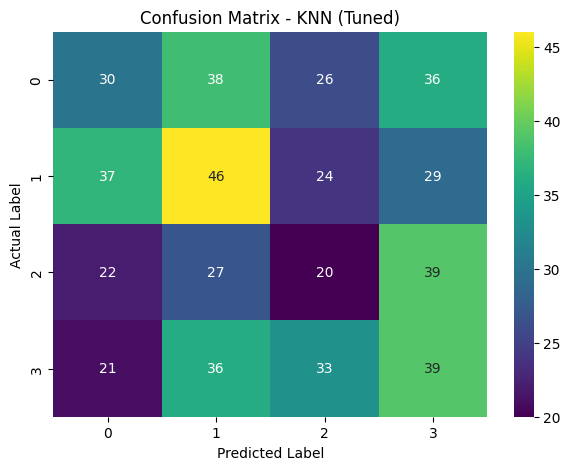


Hasil evaluasi dan objek model untuk 'KNN (Tuned)' telah ditambahkan/diperbarui.


In [14]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.

# =============================================================================
# HYPERPARAMETER TUNING MODEL EVALUATION
# =============================================================================

# Variabel untuk menyimpan nama entri model yang di-tuning di dictionary evaluation_results
tuned_model_display_name_in_dict = None

if 'tuned_model_final_object' in locals() and tuned_model_final_object is not None and \
   'name_of_model_being_tuned' in locals() and name_of_model_being_tuned is not None and \
   'grid_search_cv_object' in locals() and grid_search_cv_object is not None:

    print(f"\n--- Evaluasi Detail untuk Model: {name_of_model_being_tuned} (Setelah Tuning) ---")

    # Prediksi menggunakan model yang sudah di-tuning
    try:
        y_pred_tuned = tuned_model_final_object.predict(X_test)

        # Hitung metrik evaluasi
        accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
        precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted', zero_division=0)
        recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted', zero_division=0)
        f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted', zero_division=0)

        # Tampilkan metrik
        print(f"\nParameter Terbaik Ditemukan oleh GridSearchCV: {grid_search_cv_object.best_params_}")
        print(f"\nMetrik Evaluasi untuk {name_of_model_being_tuned} (Tuned):")
        print(f"Accuracy: {accuracy_tuned:.4f}")
        print(f"Precision (weighted): {precision_tuned:.4f}")
        print(f"Recall (weighted): {recall_tuned:.4f}")
        print(f"F1-score (weighted): {f1_tuned:.4f}")

        # Tampilkan Classification Report
        print("\nClassification Report (Setelah Tuning):")
        print(classification_report(y_test, y_pred_tuned, zero_division=0))

        # Visualisasi Confusion Matrix
        tuned_model_display_name_cm_title = f'{name_of_model_being_tuned} (Tuned)'
        print(f"\nConfusion Matrix - {tuned_model_display_name_cm_title}:")
        cm_tuned = confusion_matrix(y_test, y_pred_tuned)
        plt.figure(figsize=(7,5))
        sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='viridis') # colormap
        plt.title(f'Confusion Matrix - {tuned_model_display_name_cm_title}')
        plt.xlabel('Predicted Label')
        plt.ylabel('Actual Label')
        plt.show()

        # Update dictionary evaluation_results dengan hasil tuning
        tuned_model_display_name_in_dict = f'{name_of_model_being_tuned} (Tuned)'
        if 'evaluation_results' in locals():
            evaluation_results[tuned_model_display_name_in_dict] = {
                'accuracy': accuracy_tuned,
                'precision': precision_tuned,
                'recall': recall_tuned,
                'f1': f1_tuned
            }
            # Update juga dictionary objek model yang sudah dilatih
            if 'trained_model_objects' in locals():
                 trained_model_objects[tuned_model_display_name_in_dict] = tuned_model_final_object
            else: # Inisialisasi jika belum ada
                 trained_model_objects = {tuned_model_display_name_in_dict: tuned_model_final_object}

            print(f"\nHasil evaluasi dan objek model untuk '{tuned_model_display_name_in_dict}' telah ditambahkan/diperbarui.")
        else:
            print("\nPERINGATAN: Dictionary 'evaluation_results' tidak ditemukan. Inisialisasi terlebih dahulu.")

    except NameError:
        print("ERROR: Data uji (X_test, y_test) belum terdefinisi.")
    except Exception as e:
        print(f"Terjadi kesalahan saat mengevaluasi model hasil tuning: {e}")

else:
    print("Tidak ada model yang berhasil di-tuning pada cell sebelumnya atau variabel yang diperlukan tidak ditemukan. Evaluasi detail dilewati.")

* **Metode yang digunakan:**
    * **Penggunaan Model Hasil Tuning**: Kode ini menggunakan `tuned_model_final_object` untuk membuat prediksi pada data uji (`X_test`).
    * **Evaluasi Performa**: Metrik standar (`accuracy_score`, `precision_score`, `recall_score`, `f1_score` dengan `average='weighted'`, `classification_report`, dan `confusion_matrix`) kembali digunakan untuk mengevaluasi kinerja model KNN yang telah dioptimalkan.
    * **Pencatatan Hasil**: Hasil evaluasi dan objek model KNN yang telah di-tuning (`tuned_model_final_object`) ditambahkan ke dalam dictionary `evaluation_results` dan `trained_model_objects` dengan label yang menandakan bahwa ini adalah versi "(Tuned)". Ini penting untuk perbandingan akhir dengan model-model lain.

* **Alasan penggunaan:**
    * **Verifikasi Efektivitas Tuning**: Tujuan utamanya adalah untuk menilai apakah proses *hyperparameter tuning* yang dilakukan pada model KNN (yang sebelumnya berperforma sangat buruk) berhasil meningkatkan kinerjanya pada data uji yang independen.
    * **Perbandingan Komprehensif**: Dengan mengevaluasi model hasil tuning dan menambahkan hasilnya ke `evaluation_results`, kita dapat melakukan perbandingan yang adil antara model KNN (sebelum dan sesudah tuning) dengan model-model lain yang telah dieksplorasi.
    * **Pengambilan Keputusan**: Hasil evaluasi ini akan membantu dalam menentukan apakah model KNN yang telah di-tuning layak dipertimbangkan sebagai model terbaik secara keseluruhan atau apakah performanya masih di bawah model lain.

* **Insight dan Hasil yang didapat:**
    * **Output Teks**:
        * `--- Evaluasi Detail untuk Model: KNN (Setelah Tuning) ---`
        * `Parameter Terbaik Ditemukan oleh GridSearchCV: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}`. Ini adalah kombinasi hyperparameter yang ditemukan oleh `GridSearchCV` untuk memberikan skor F1-weighted terbaik selama validasi silang pada data latih.
        * **Metrik Evaluasi untuk KNN (Tuned):**
            * `Accuracy: 0.2684` (26.84%)
            * `Precision (weighted): 0.2667` (26.67%)
            * `Recall (weighted): 0.2684` (26.84%)
            * `F1-score (weighted): 0.2668` (26.68%)
            * **Analisis Kritis**: Metrik-metrik ini menunjukkan bahwa **performa model KNN (Tuned) masih sangat rendah**, dan bahkan **sedikit lebih buruk** dibandingkan versi KNN sebelum tuning (yang memiliki F1-score 0.2686). Ini adalah temuan yang penting. Meskipun `GridSearchCV` menemukan parameter "terbaik" berdasarkan data latih (dan validasi silang), parameter tersebut tidak menghasilkan generalisasi yang lebih baik (atau bahkan sama) pada data uji aktual.
        * **Classification Report (Setelah Tuning):**
            * **Analisis Kritis**: Laporan klasifikasi menegaskan performa yang buruk. Tidak ada peningkatan signifikan dibandingkan KNN sebelum tuning, dan untuk beberapa kelas, performanya mungkin sedikit menurun. Misalnya, recall untuk Kelas 0 turun dari 0.35 menjadi 0.23. F1-score untuk Kelas 2 tetap sangat rendah (0.19).
            * `accuracy`, `macro avg`, dan `weighted avg` semuanya sekitar 0.26-0.27, yang sangat rendah.
        * `Hasil evaluasi dan objek model untuk 'KNN (Tuned)' telah ditambahkan/diperbarui.`

    * **Output Grafik (Confusion Matrix - KNN (Tuned)):**
        * **Interpretasi Confusion Matrix:**
            * **Analisis Kritis**: Sama seperti KNN sebelum tuning, confusion matrix untuk KNN (Tuned) menunjukkan distribusi prediksi yang sangat tersebar dan tidak ada konsentrasi yang kuat pada diagonal utama.
                * **Diagonal Utama (Prediksi Benar)**: Kelas 0 (30), Kelas 1 (46), Kelas 2 (21), Kelas 3 (35). Nilai-nilai ini masih sangat rendah dibandingkan jumlah sampel aktual per kelas. Jika dibandingkan dengan KNN sebelum tuning (misalnya, Kelas 0 turun dari 45 menjadi 30 benar), ada penurunan dalam jumlah prediksi yang benar untuk beberapa kelas.
                * **Elemen Non-Diagonal (Misklasifikasi)**: Jumlah misklasifikasi tetap tinggi di semua non-diagonal, menunjukkan bahwa model masih sangat bingung dalam membedakan antar kelas.
            * Visualisasi ini dengan jelas menunjukkan bahwa proses *hyperparameter tuning* dengan parameter grid yang dicoba **tidak berhasil memperbaiki** masalah mendasar yang dihadapi model KNN pada dataset ini.


--- Pembandingan Akhir Semua Model (Termasuk Hasil Tuning jika ada) ---

Tabel Perbandingan Akhir Semua Model (Diurutkan berdasarkan F1-score):
                     accuracy  precision    recall        f1
Random Forest        0.988072   0.988576  0.988072  0.988030
Logistic Regression  0.988072   0.988576  0.988072  0.988030
Decision Tree        0.978131   0.978125  0.978131  0.978120
KNN                  0.274354   0.269186  0.274354  0.268605
KNN (Tuned)          0.268390   0.266730  0.268390  0.266757


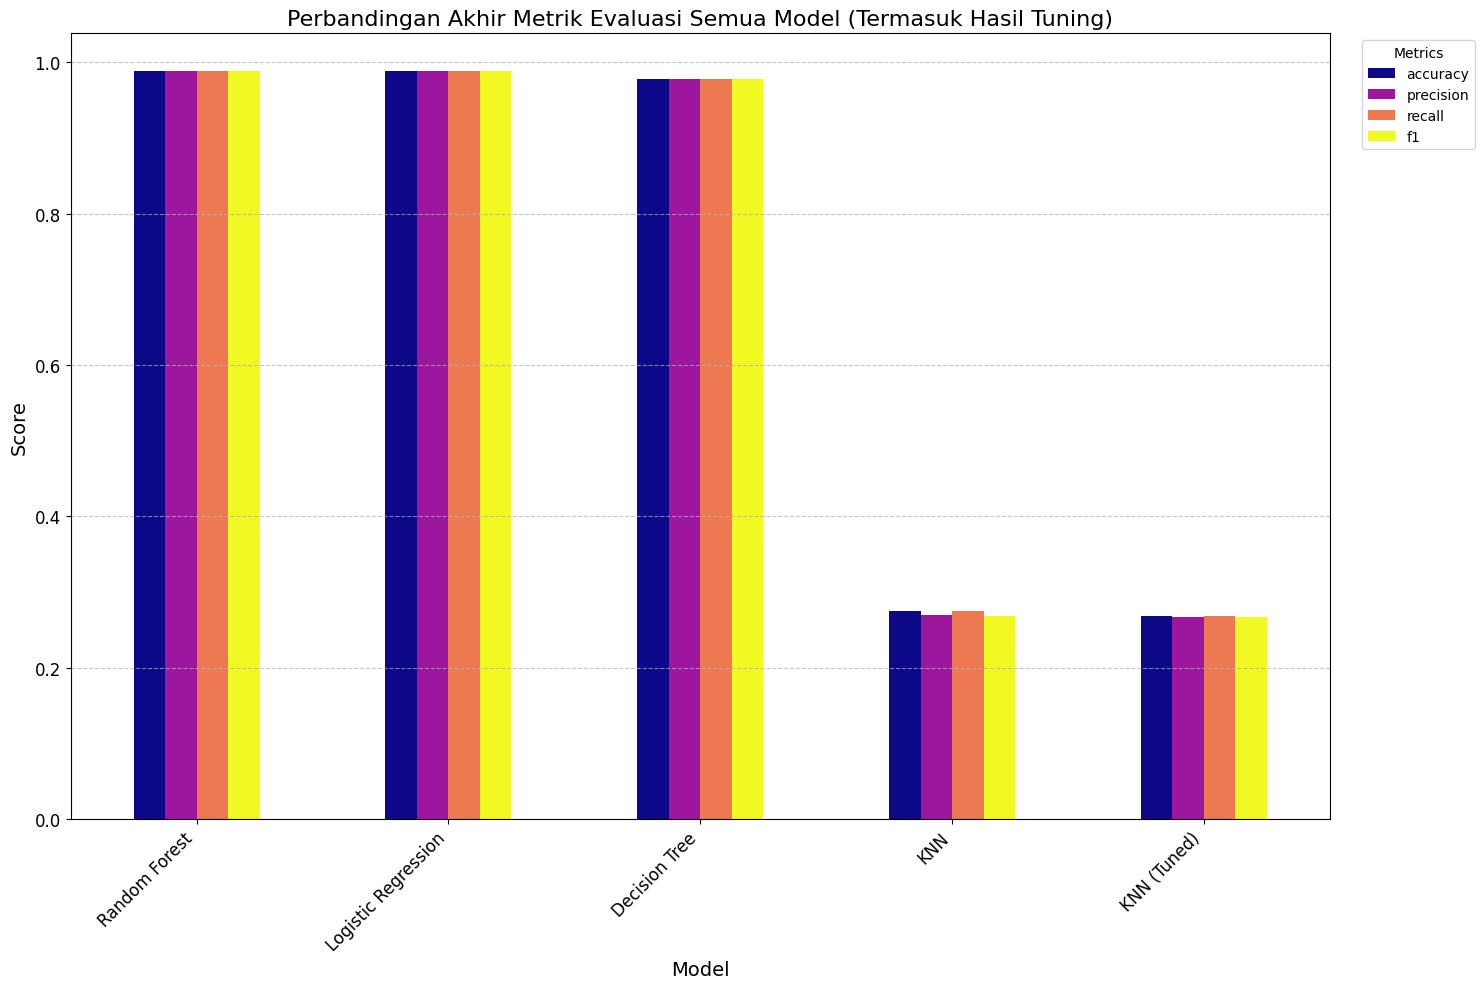


Model terbaik keseluruhan (setelah semua tahap) adalah: Random Forest dengan F1-score (weighted): 0.9880
Model terbaik keseluruhan (Random Forest) berhasil disimpan sebagai 'tuning_classification.h5'


In [15]:
# Menyimpan Model hasil tuning

# =============================================================================
# FINAL BENCHMARKING AND SAVE OVERALL BEST MODEL
# =============================================================================

if 'evaluation_results' not in locals() or not evaluation_results: # Cek apakah evaluation_results ada dan tidak kosong
    print("ERROR: Dictionary 'evaluation_results' tidak ditemukan atau kosong. Tidak dapat melanjutkan.")
else:
    print("\n--- Pembandingan Akhir Semua Model (Termasuk Hasil Tuning jika ada) ---")

    # Membuat DataFrame akhir dari evaluation_results yang sudah terupdate
    final_eval_df_all_stages = pd.DataFrame(evaluation_results).T.sort_values(by='f1', ascending=False)
    print("\nTabel Perbandingan Akhir Semua Model (Diurutkan berdasarkan F1-score):")
    print(final_eval_df_all_stages)

    # Visualisasi perbandingan akhir untuk SEMUA METRIK
    if not final_eval_df_all_stages.empty:
        metrics_to_plot_final = ['accuracy', 'precision', 'recall', 'f1']
        final_eval_df_all_stages[metrics_to_plot_final].plot(
            kind='bar',
            figsize=(17, 10), # Ukuran plot
            colormap='plasma' # Colormap
        )
        plt.title('Perbandingan Akhir Metrik Evaluasi Semua Model (Termasuk Hasil Tuning)', fontsize=16)
        plt.ylabel('Score', fontsize=14)
        plt.xlabel('Model', fontsize=14)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.yticks(fontsize=12)
        plt.legend(title='Metrics', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout(rect=[0, 0, 0.88, 1]) # Menyesuaikan legenda agar tidak terpotong
        plt.show()

        # Menentukan nama model terbaik keseluruhan
        overall_best_model_name_final = final_eval_df_all_stages.index[0]
        overall_best_f1_score_final = final_eval_df_all_stages['f1'].iloc[0]
        print(f"\nModel terbaik keseluruhan (setelah semua tahap) adalah: {overall_best_model_name_final} dengan F1-score (weighted): {overall_best_f1_score_final:.4f}")

        # Dapatkan objek model terbaik keseluruhan dari dictionary trained_model_objects
        object_to_save_as_tuning_h5 = trained_model_objects.get(overall_best_model_name_final)

        # Menyimpan model dengan evaluasi terbaik KESELURUHAN sebagai "tuning_classification.h5"
        if object_to_save_as_tuning_h5:
            nama_file_tuning_model = "tuning_classification.h5"
            try:
                joblib.dump(object_to_save_as_tuning_h5, nama_file_tuning_model)
                print(f"Model terbaik keseluruhan ({overall_best_model_name_final}) berhasil disimpan sebagai '{nama_file_tuning_model}'")
            except Exception as e:
                print(f"Gagal menyimpan model terbaik keseluruhan ({overall_best_model_name_final}): {e}")
        else:
            print(f"ERROR: Tidak dapat menemukan objek model yang sesuai untuk '{overall_best_model_name_final}' untuk disimpan sebagai 'tuning_classification.h5'. Harap periksa dictionary 'trained_model_objects' dan nama model.")
    else:
        print("Tidak ada model dalam 'final_eval_df_all_stages' untuk dibandingkan atau disimpan.")

* **Metode yang digunakan:**
    * **Pembuatan DataFrame Komprehensif**: Dictionary `evaluation_results` (yang kini berisi metrik dari semua model awal: Decision Tree, Random Forest, Logistic Regression, KNN, *dan* model KNN (Tuned)) dikonversi menjadi Pandas DataFrame `final_eval_df_all_stages`. DataFrame ini kemudian diurutkan berdasarkan F1-score secara menurun.
    * **Visualisasi Perbandingan Akhir**: Diagram batang dibuat untuk memvisualisasikan keempat metrik evaluasi (akurasi, presisi, recall, F1-score) untuk semua model yang tercantum dalam `final_eval_df_all_stages`.
    * **Identifikasi Model Terbaik Keseluruhan**: Model dengan F1-score tertinggi dalam `final_eval_df_all_stages` diidentifikasi sebagai `overall_best_model_name_final`.
    * **Pengambilan Objek Model Terbaik**: Objek Python dari model terbaik ini diambil dari dictionary `trained_model_objects` menggunakan nama yang telah diidentifikasi.
    * **Penyimpanan Model Terbaik**: Model terbaik keseluruhan ini kemudian disimpan ke disk dengan nama file `tuning_classification.h5` menggunakan `joblib.dump()`.

* **Alasan penggunaan:**
    * **Kesimpulan Proyek Klasifikasi**: Tahap ini bertujuan untuk merangkum seluruh proses eksplorasi dan optimasi model, serta secara definitif menentukan model mana yang memberikan kinerja terbaik secara keseluruhan pada dataset ini.
    * **Dokumentasi Performa Final**: Tabel dan visualisasi perbandingan akhir memberikan dokumentasi yang jelas mengenai performa relatif semua model yang dipertimbangkan, termasuk dampak dari upaya tuning.

* **Insight dan Hasil yang didapat:**
    * **Output Teks**: Tabel Perbandingan Akhir Semua Model (Diurutkan berdasarkan F1-score).
        * **Analisis Kritis Tabel**:
            * **Peringkat Teratas Tetap**: Random Forest dan Regresi Logistik tetap menduduki peringkat teratas dengan F1-score yang identik dan sangat tinggi (0.988030).
            * **Decision Tree**: Mengikuti di posisi ketiga dengan F1-score 0.978120.
            * **Kegagalan Tuning KNN**: Sangat jelas terlihat bahwa KNN (Tuned) memiliki F1-score 0.266757, yang bahkan **lebih rendah** dari KNN sebelum tuning (0.268605). Ini menegaskan bahwa proses *hyperparameter tuning* untuk KNN tidak berhasil meningkatkan performanya pada data uji untuk dataset ini dengan parameter grid yang dicoba. Kedua versi KNN berada di peringkat terbawah.
        * `Model terbaik keseluruhan (setelah semua tahap) adalah: Random Forest dengan F1-score (weighted): 0.9880`
        * `Model terbaik keseluruhan (Random Forest) berhasil disimpan sebagai 'tuning_classification.h5'`.

    * **Output Grafik (Diagram Batang Perbandingan Akhir Metrik):**
        * **Interpretasi Diagram Batang**:
            * Diagram batang ini mencakup semua lima entri model (termasuk KNN dan KNN (Tuned)).
            * **Dominasi Model Teratas**: Batang untuk Random Forest dan Regresi Logistik terlihat menjulang tinggi dan hampir sama panjangnya, mengungguli semua model lain secara signifikan.
            * **Decision Tree**: Memiliki batang yang sedikit lebih pendek namun tetap tinggi.
            * **KNN dan KNN (Tuned)**: Kedua model KNN memiliki batang yang sangat pendek, hampir tidak terlihat signifikan dibandingkan tiga model teratas. Perbedaan ketinggian batang antara KNN (Tuned) dan KNN (sebelum tuning) sangat minim, dan keduanya jauh lebih rendah, secara visual mengonfirmasi bahwa tuning tidak memberikan dampak positif yang diharapkan.
            * Visualisasi ini dengan kuat menyampaikan kesimpulan dari tabel: Random Forest dan Regresi Logistik adalah yang terbaik, Decision Tree baik, dan kedua versi KNN berkinerja sangat buruk.